In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading df model
df_model = pd.read_csv(r'../../results/computed-fuel-rates.csv', delimiter=',', skiprows=0, low_memory=False)
df_model.drop(['Unnamed: 0'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.1'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.2'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.3'], axis=1, inplace=True)
df_model.drop(['Unnamed: 0.4'], axis=1, inplace=True)
df_model.sort_values(by=['Vehicle','ServiceDateTime'], inplace=True)

In [11]:
df_model['Vehicle'].loc[df_model['Powertrain']=='electric'].unique()

array([1320, 1321, 1322, 1323, 1410, 1411, 1412, 1413, 1415, 1416, 1420,
       1421, 3501], dtype=int64)

In [25]:
df_model['Operator'].loc[df_model['Vehicle']==1412]

13207    SATCo
13208    SATCo
13209    SATCo
13210    SATCo
13211    SATCo
         ...  
13985    SATCo
13986    SATCo
13987    SATCo
13988    SATCo
13989    SATCo
Name: Operator, Length: 783, dtype: object

In [10]:
df_model.loc[df_model['Vehicle']==1412]

ServiceDateTime  DateKey             CalendarDate  Year  Month  \
13207  2022-04-08 14:10:07     8767  2022-04-08 00:00:00.000  2022      4   
13208  2022-04-12 14:01:44     8771  2022-04-12 00:00:00.000  2022      4   
13209  2022-04-12 14:30:12     8771  2022-04-12 00:00:00.000  2022      4   
13210  2022-04-12 14:30:12     8771  2022-04-12 00:00:00.000  2022      4   
13211  2022-04-12 14:30:40     8771  2022-04-12 00:00:00.000  2022      4   
...                    ...      ...                      ...   ...    ...   
13985  2022-04-15 19:40:15     8774  2022-04-15 00:00:00.000  2022      4   
13986  2022-04-15 19:41:52     8774  2022-04-15 00:00:00.000  2022      4   
13987  2022-04-15 19:58:17     8774  2022-04-15 00:00:00.000  2022      4   
13988  2022-04-15 19:58:17     8774  2022-04-15 00:00:00.000  2022      4   
13989  2022-04-15 20:40:16     8774  2022-04-15 00:00:00.000  2022      4   

       OpKey Operator  RtKey  RtKey2    Route  ... time_delta_in_seconds  \
13207      2    SATCo   3630    1104     9999  ...                   0.0   
13208      2    SATCo   3631    1104     9999  ...                   0.0   
13209      2    SATCo   3631    1104     9999  ...                1708.0   
13210      2    SATCo   3641    3284  (X) 892  ...                   0.0   
13211      2    SATCo   3641    3284  (X) 892  ...                  28.0   
...      ...      ...    ...     ...      ...  ...                   ...   
13985      2    SATCo   3661    1114      921  ...                  71.0   
13986      2    SATCo   3661    1114      921  ...                  97.0   
13987      2    SATCo   3631    1104     9999  ...                 985.0   
13988      2    SATCo   3661    1114      921  ...                   0.0   
13989      2    SATCo   3631    1104     9999  ...                2519.0   

           dist      Speed  Acceleration  Powertrain             VehicleModel  \
13207  0.000000   0.000000      0.000000    electric  PROTERRA CATALYST BE-40   
13208  0.000000   0.000000      0.000000    electric  PROTERRA CATALYST BE-40   
13209  1.469683   4.985242      0.000811    electric  PROTERRA CATALYST BE-40   
13210  0.000000   0.000000      0.000000    electric  PROTERRA CATALYST BE-40   
13211  0.087598  18.125378      0.179816    electric  PROTERRA CATALYST BE-40   
...         ...        ...           ...         ...                      ...   
13985  0.114716   9.360878     -0.079701    electric  PROTERRA CATALYST BE-40   
13986  0.519115  31.005765      0.061984    electric  PROTERRA CATALYST BE-40   
13987  2.017368  11.865857     -0.005398    electric  PROTERRA CATALYST BE-40   
13988  0.000000   0.000000      0.000000    electric  PROTERRA CATALYST BE-40   
13989  4.829237  11.107099      0.001225    electric  PROTERRA CATALYST BE-40   

       Vehicle_mass  elevation     grade    Energy  
13207         27370       68.0  0.000000  0.000000  
13208         27370       64.0  0.000000  0.000000  
13209         27370       64.0  0.000000  1.212729  
13210         27370       64.0  0.000000  0.000000  
13211         27370       64.0  0.000000  0.320025  
...             ...        ...       ...       ...  
13985         27370       55.0  0.016245  0.116480  
13986         27370       23.0 -0.038316 -1.603800  
13987         27370       20.0 -0.000924  0.000590  
13988         27370       20.0  0.000000  0.000000  
13989         27370       64.0  0.005659  7.309022  

[783 rows x 45 columns]

In [4]:
### Vehicle-based fuel rates

In [83]:
# Preparation for plotting fuel rate by vehicle  
df_model_aggregated = df_model.groupby(['Vehicle', 'Date']).agg({'Energy': ['sum'],'dist': ['sum'],'Onboard':['sum'] ,'Powertrain':['max'],'VehicleModel':['max']}).reset_index()
df_model_aggregated.columns = df_model_aggregated.columns.droplevel(1)
df_model_aggregated['fuel_economy']=df_model_aggregated['dist']/df_model_aggregated['Energy']
df_conventional_integerated=df_model_aggregated.loc[df_model_aggregated['Powertrain'] == 'conventional'].copy()
df_hybrid_integerated=df_model_aggregated.loc[df_model_aggregated['Powertrain'] == 'hybrid'].copy()

In [84]:
df_model.columns

Index(['ServiceDateTime', 'DateKey', 'CalendarDate', 'Year', 'Month', 'OpKey',
       'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName', 'TripKey', 'Trip',
       'StopKey', 'Stop', 'StopName', 'Lat', 'Lon', 'Vehicle', 'VehicleType',
       'SeatedCap', 'TotalCap', 'Boards', 'Alights', 'Onboard', 'Bike',
       'Wheelchair', 'Weekday', 'Hour', 'Minute', 'Second', 'Date', 'Daytype',
       'time', 'time_delta', 'time_delta_in_seconds', 'dist', 'Speed',
       'Acceleration', 'Powertrain', 'VehicleModel', 'Vehicle_mass',
       'elevation', 'grade', 'Energy'],
      dtype='object')

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_16800\2528353200.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Vehicle', y='fuel_economy', data=df_conventional_integerated, hue='VehicleModel', linewidth=5, ci=None)


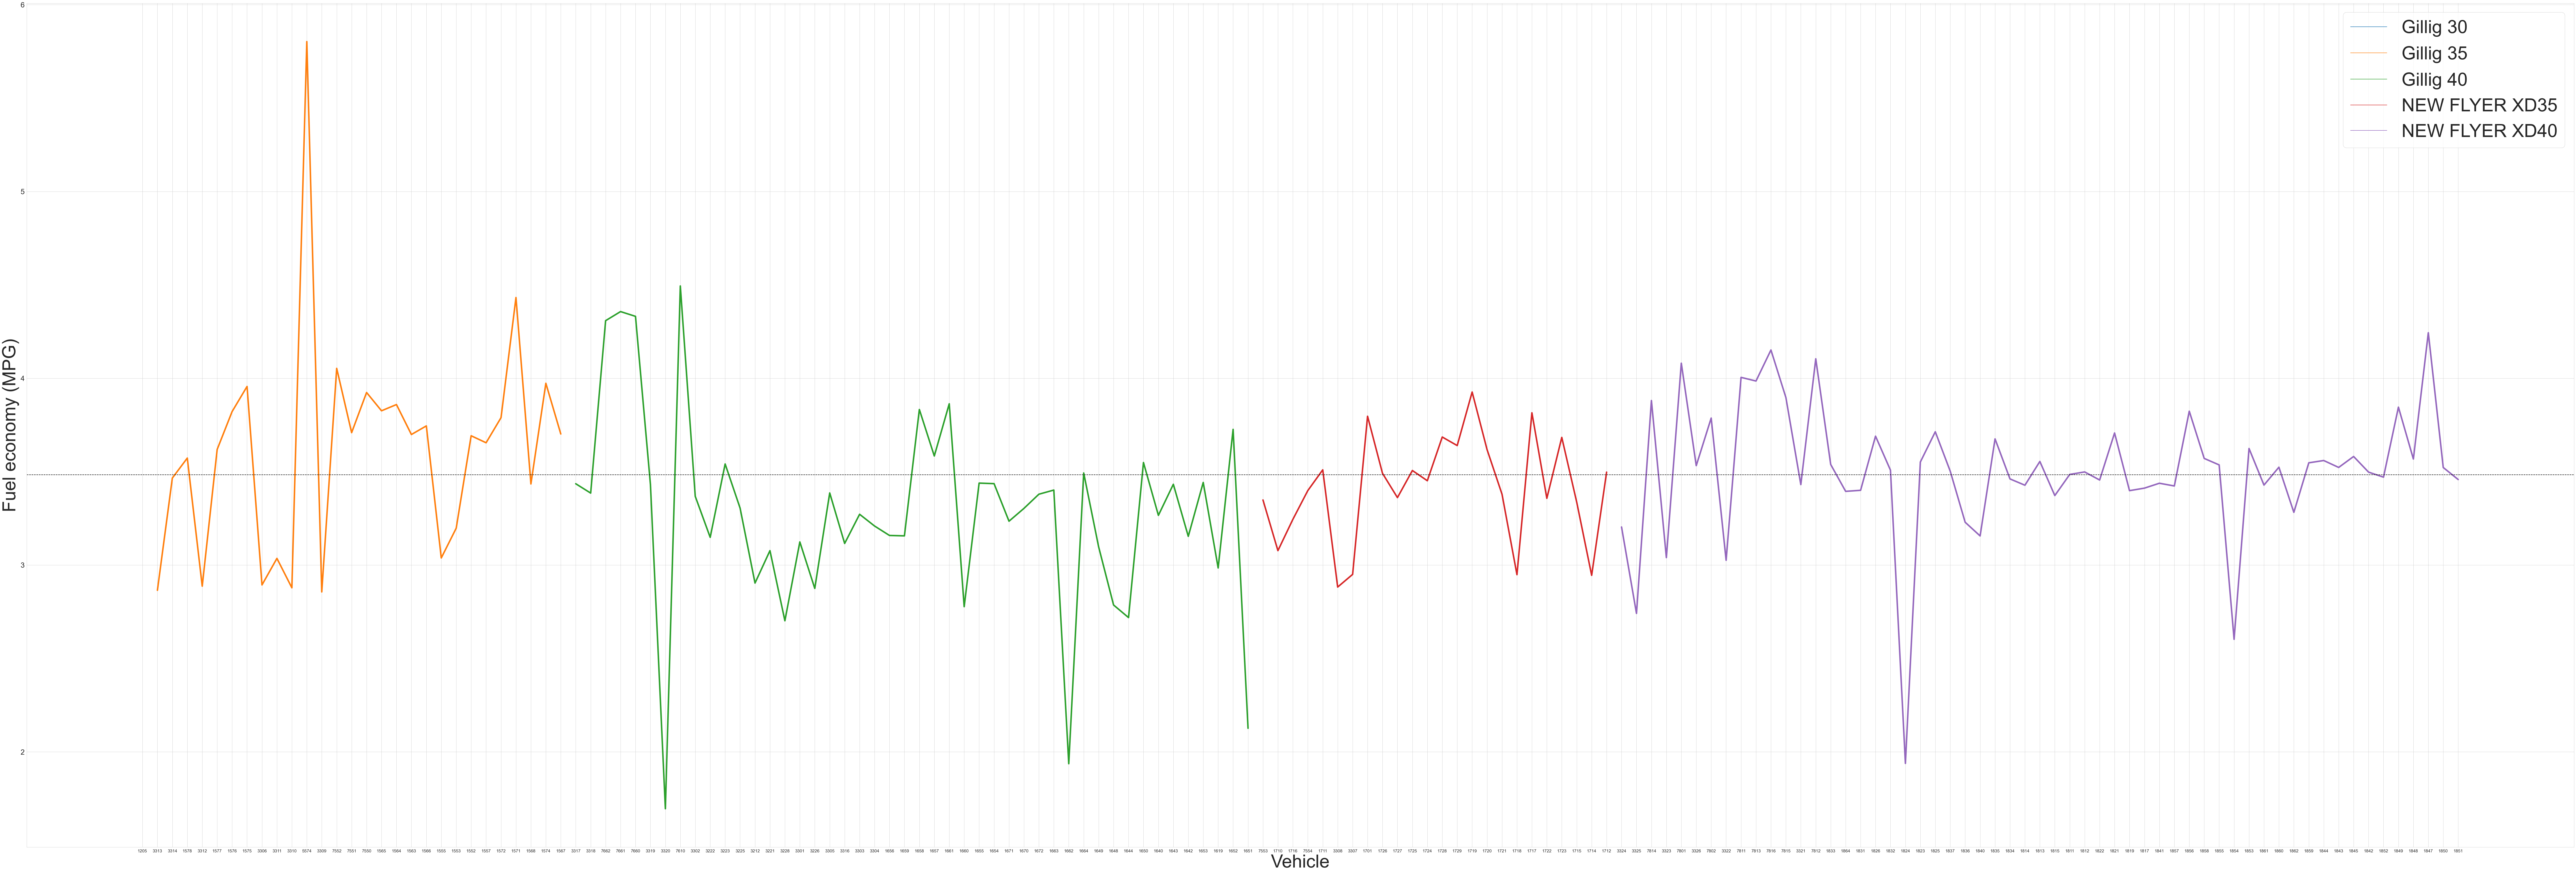

In [85]:
# Plot fuel rate by vehicle (Conventional)
fig, ax = plt.subplots(figsize=(150,50))
df_conventional_integerated.sort_values(by=['VehicleModel'], inplace=True)
df_conventional_integerated['Vehicle'] = df_conventional_integerated.Vehicle.astype(str)
sns.lineplot(x='Vehicle', y='fuel_economy', data=df_conventional_integerated, hue='VehicleModel', linewidth=5, ci=None)
plt.axhline(df_conventional_integerated['fuel_economy'].mean(),color='black', linestyle='--')
plt.xlabel('Vehicle', fontsize=60)
plt.ylabel('Fuel economy (MPG)', fontsize=60)
plt.xticks(fontsize=14)
plt.yticks(fontsize=24)
plt.legend(fontsize=60)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
fig.savefig(r'../../figures/fuel-economy-conventional-per-vehicle.png', dpi=400, bbox_inches='tight')

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_16800\250797113.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='fuel_economy', data=df_conventional_integerated, hue='VehicleModel', linewidth=3, ci=None)


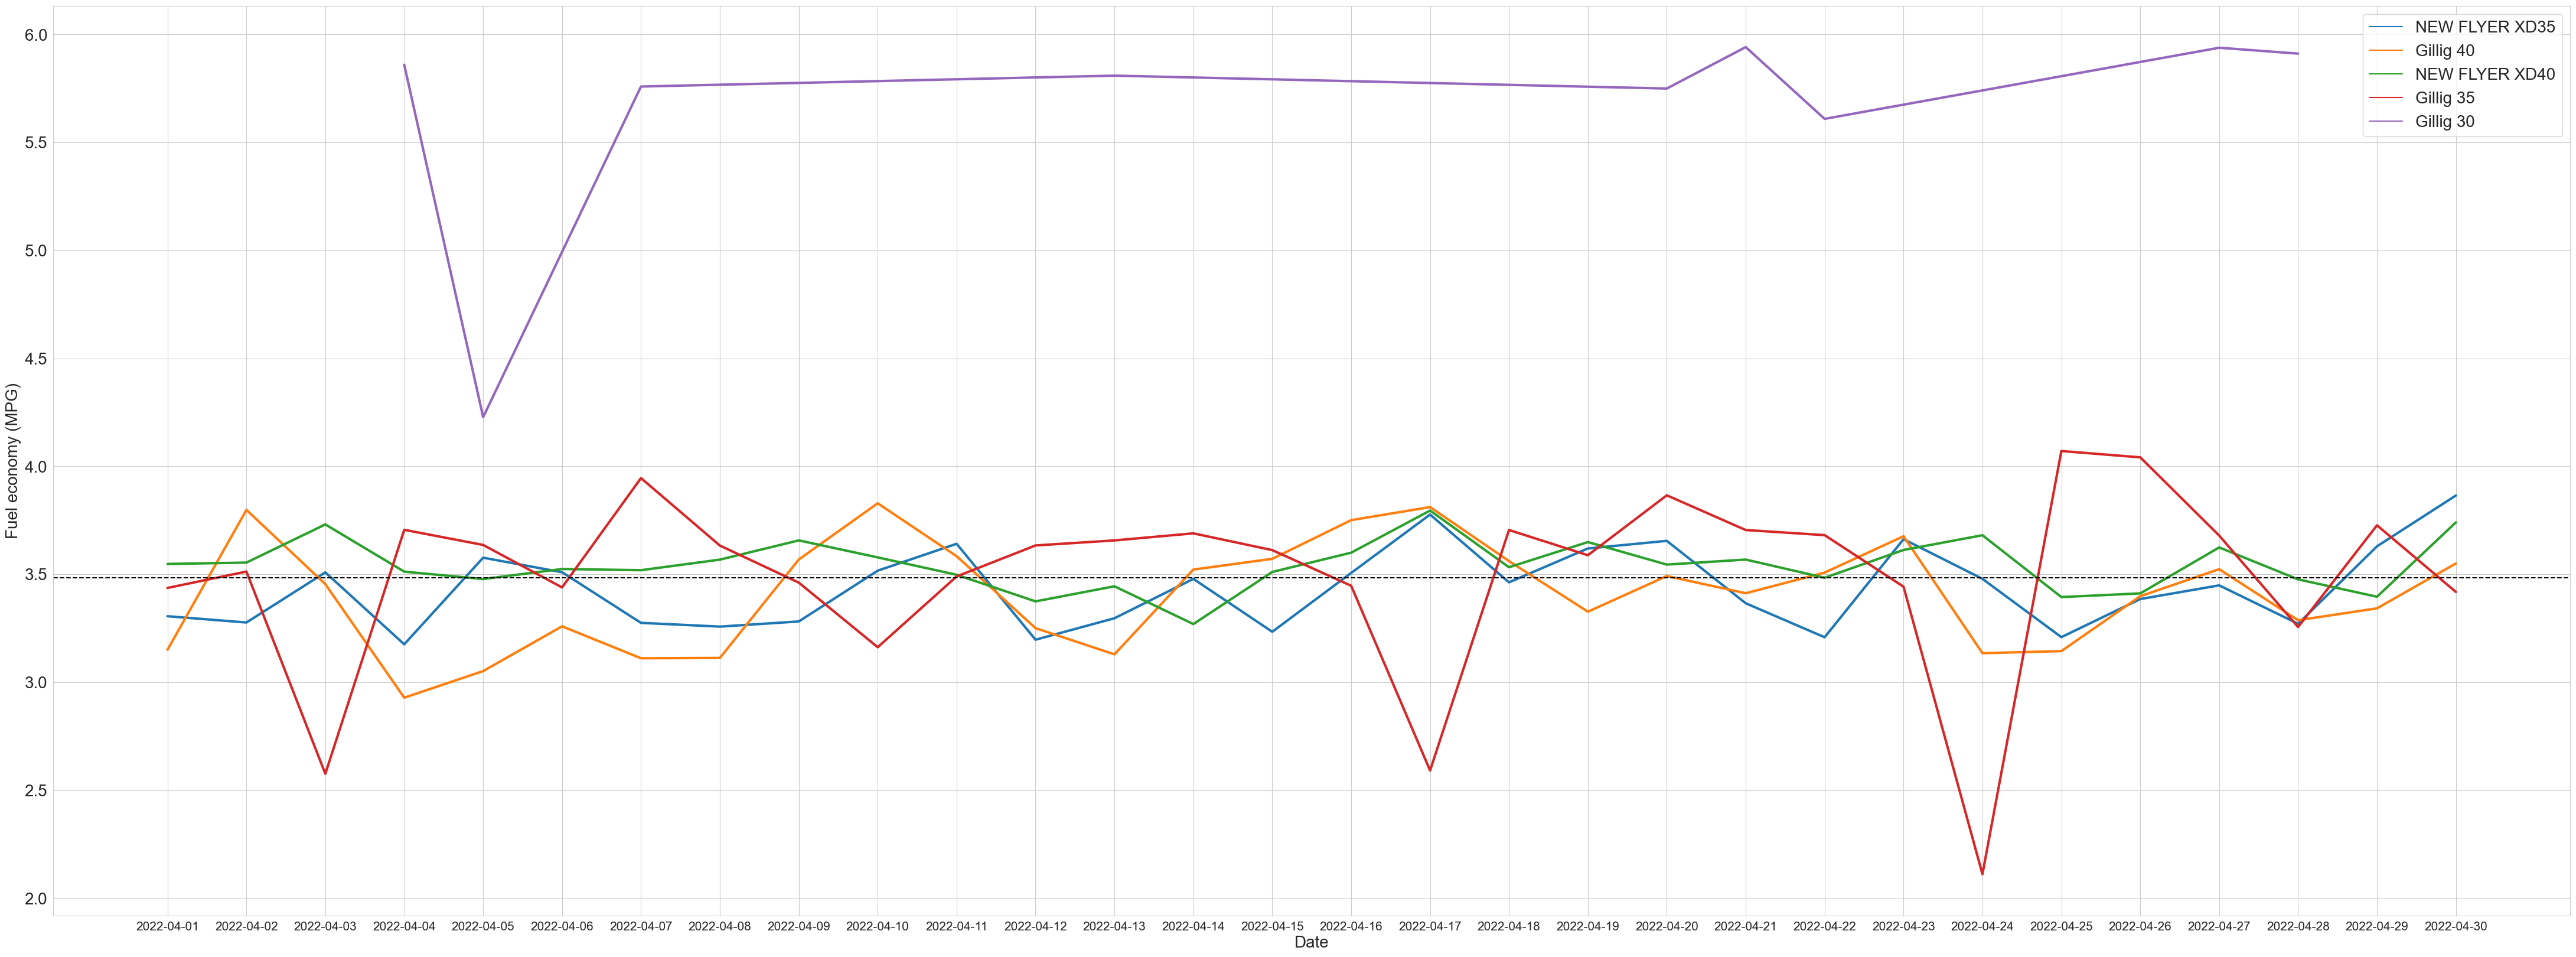

In [86]:
# Plot fuel rate by vehicle (Conventional)
fig, ax = plt.subplots(figsize=(55,20))
df_conventional_integerated.sort_values(by=['Date'], inplace=True)
#df_conventional_integerated['Vehicle'] = df_conventional_integerated.Vehicle.astype(str)
sns.lineplot(x='Date', y='fuel_economy', data=df_conventional_integerated, hue='VehicleModel', linewidth=3, ci=None)
plt.axhline(df_conventional_integerated['fuel_economy'].mean(),color='black', linestyle='--')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Fuel economy (MPG)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
fig.savefig(r'../../figures/fuel-economy-conventional-per-vehicle.png', dpi=400, bbox_inches='tight')

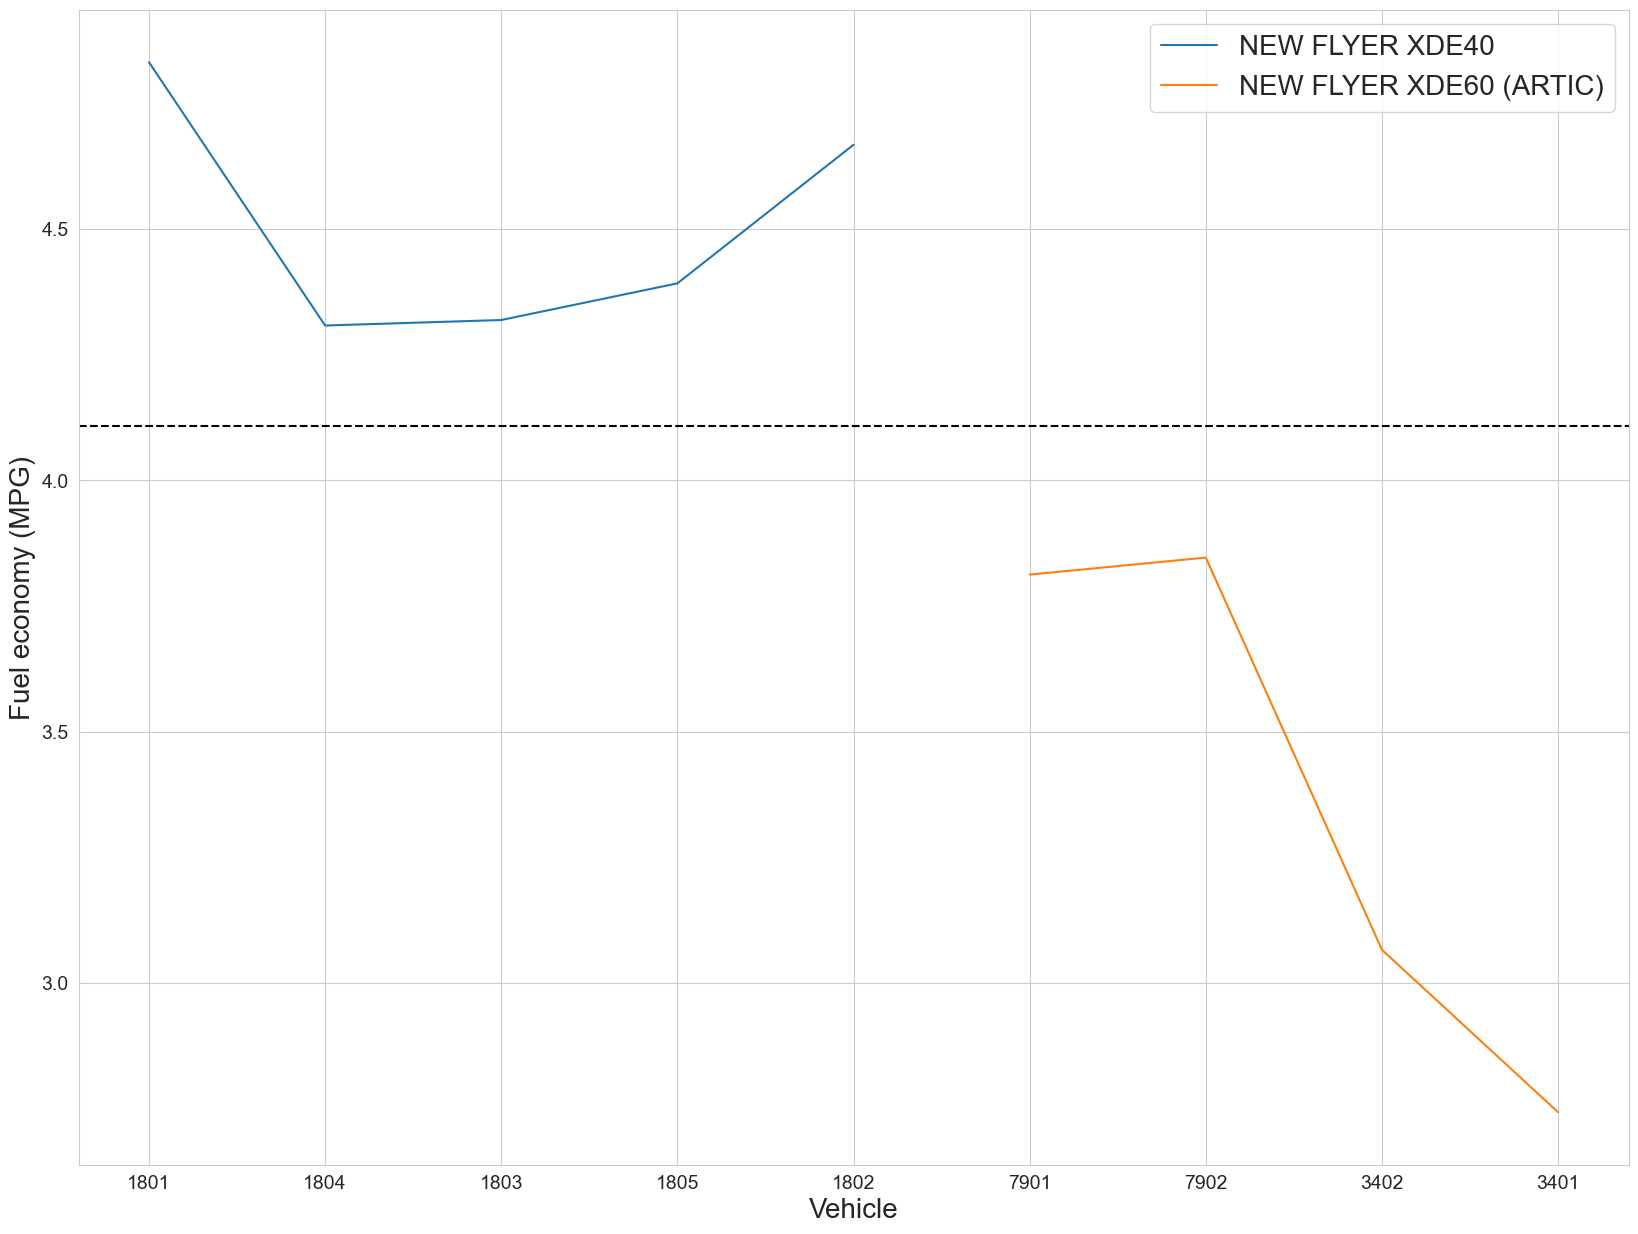

In [87]:
# Plot fuel rate by vehicle (Hybrid)
fig, ax = plt.subplots(figsize=(20,15))
df_hybrid_integerated.sort_values(by=['VehicleModel'], inplace=True)
df_hybrid_integerated['Vehicle'] = df_hybrid_integerated.Vehicle.astype(str)
sns.lineplot(x='Vehicle', y='fuel_economy', data=df_hybrid_integerated, hue='VehicleModel', errorbar=None)
plt.axhline(df_hybrid_integerated['fuel_economy'].mean(),color='black', linestyle='--')
plt.xlabel('Vehicle', fontsize=20)
plt.ylabel('Fuel economy (MPG)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
fig.savefig(r'../../figures/fuel-economy-hybrid-per-vehicle.png', dpi=400, bbox_inches='tight')

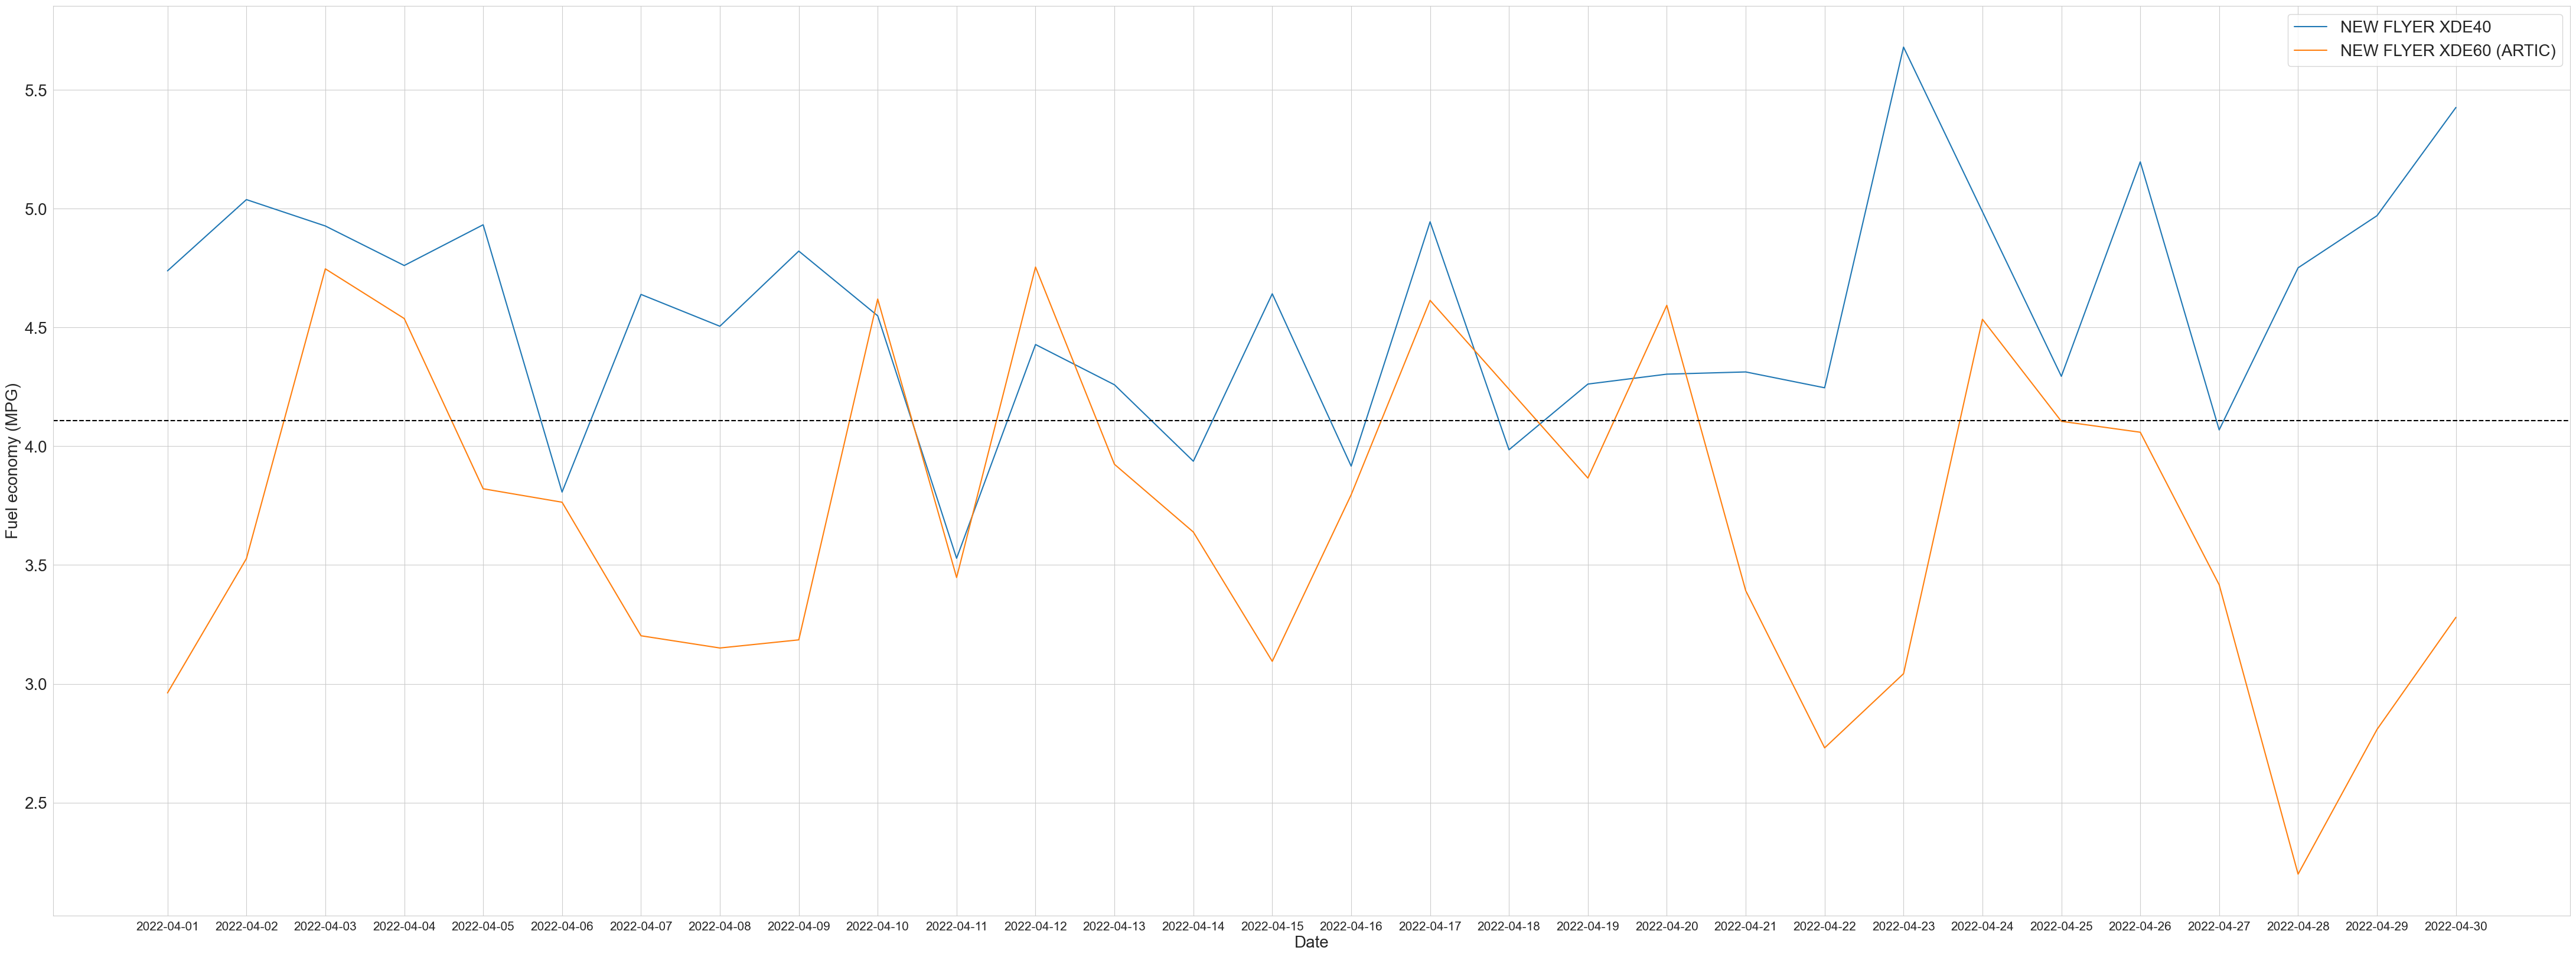

In [88]:
# Plot fuel rate by vehicle (Hybrid)
fig, ax = plt.subplots(figsize=(55,20))
df_hybrid_integerated.sort_values(by=['Date'], inplace=True)
df_hybrid_integerated['Vehicle'] = df_hybrid_integerated.Vehicle.astype(str)
sns.lineplot(x='Date', y='fuel_economy', data=df_hybrid_integerated, hue='VehicleModel', errorbar=None)
plt.axhline(df_hybrid_integerated['fuel_economy'].mean(),color='black', linestyle='--')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Fuel economy (MPG)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
fig.savefig(r'../../figures/fuel-economy-hybrid-per-vehicle.png', dpi=400, bbox_inches='tight')

In [89]:
### Route-based fuel rates

In [90]:
# Preparation for plotting fuel rate by routes  
df_model_aggregated_routes = df_model.groupby(['Route', 'Date']).agg({'Energy': ['sum'],'dist': ['sum'],'Powertrain':['max'],'VehicleModel':['max']}).reset_index()
df_model_aggregated_routes.columns = df_model_aggregated_routes.columns.droplevel(1)
df_model_aggregated_routes['Date'] = pd.to_datetime(df_model_aggregated_routes['Date'])
df_model_aggregated_routes['dayofweek']=df_model_aggregated_routes['Date'].dt.dayofweek
df_model_aggregated_routes['fuel_economy']=df_model_aggregated_routes['dist']/df_model_aggregated_routes['Energy']
df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace("X","")
df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace("(","")
df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace(")","")

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_16800\1178906146.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace("(","")
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_16800\1178906146.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace(")","")


In [91]:
df_model_aggregated_routes['weekday-weekend'] = df_model_aggregated_routes['dayofweek'].apply(lambda x: 'Sunday' if x == 6  else 'Saturday' if x == 5 else 'Weekday')

In [92]:
df_model_aggregated_routes = df_model_aggregated_routes.groupby(['Route','weekday-weekend']).agg({'fuel_economy': ['mean']}).reset_index()
df_model_aggregated_routes.columns = df_model_aggregated_routes.columns.droplevel(1)

In [93]:
df_model_aggregated_routes

Route weekday-weekend  fuel_economy
0     34         Weekday      2.973773
1     38        Saturday      3.403562
2     38          Sunday      3.322774
3     38         Weekday      3.466886
4    39E         Weekday      5.851664
..   ...             ...           ...
95   R42        Saturday      4.978914
96   R42         Weekday      5.191266
97   R44        Saturday      1.955087
98   R44          Sunday      3.085216
99   R44         Weekday      3.334099

[100 rows x 3 columns]

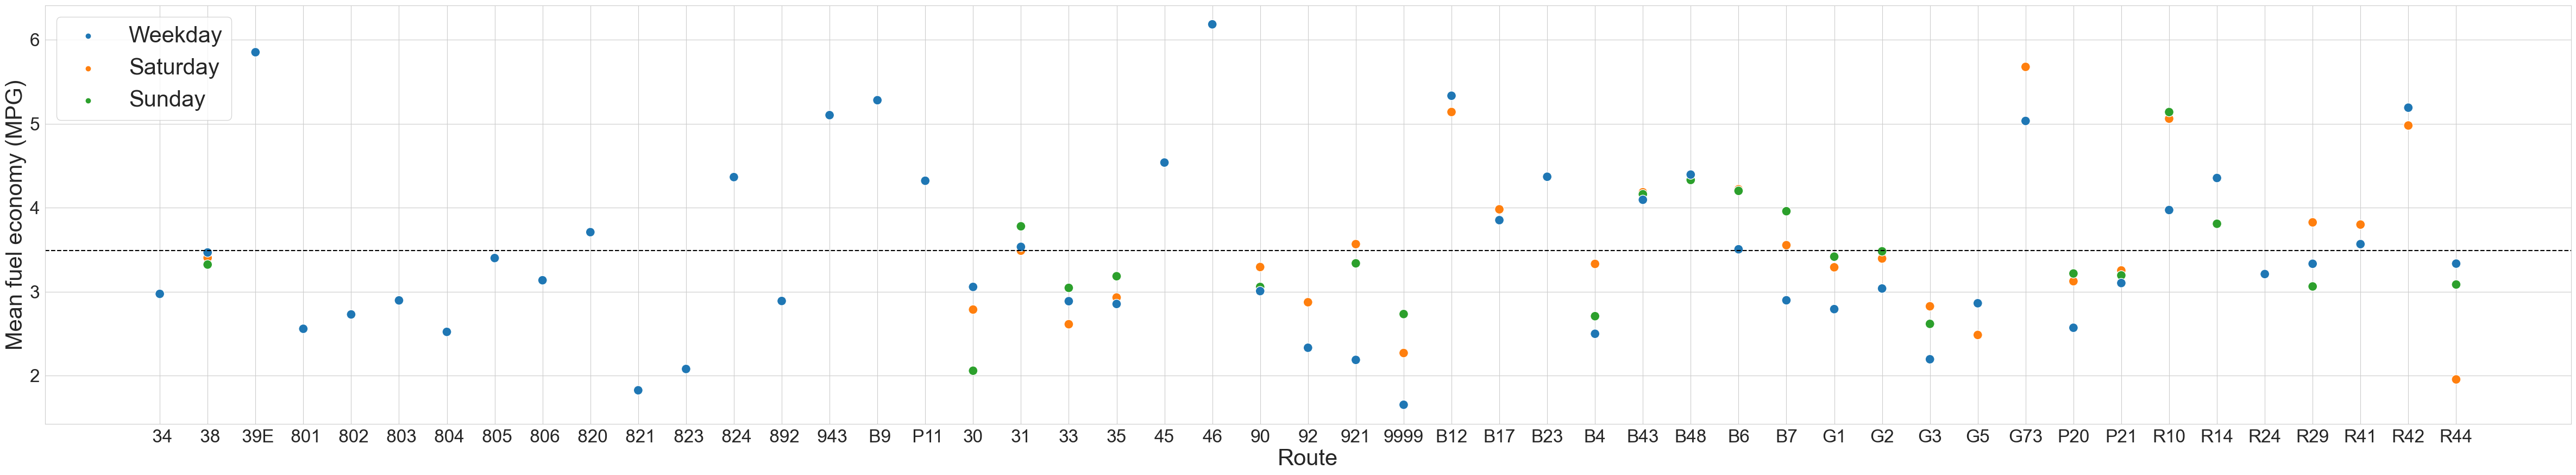

In [94]:
# Plot fuel rate by vehicle 
fig, ax = plt.subplots(figsize=(60,10))
sns.scatterplot(x='Route', y='fuel_economy', data=df_model_aggregated_routes, hue='weekday-weekend', s=150)
plt.axhline(df_model_aggregated_routes['fuel_economy'].mean(),color='black', linestyle='--')
plt.xlabel('Route', fontsize=30)
plt.ylabel('Mean fuel economy (MPG)', fontsize=30)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=30)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
fig.savefig(r'../../figures/fuel-economy-per-route.png', dpi=400, bbox_inches='tight')

In [95]:
df_model

ServiceDateTime  DateKey             CalendarDate  Year  Month  \
0        2022-04-04 06:43:24     8763  2022-04-04 00:00:00.000  2022      4   
1        2022-04-04 06:51:27     8763  2022-04-04 00:00:00.000  2022      4   
2        2022-04-04 06:51:27     8763  2022-04-04 00:00:00.000  2022      4   
3        2022-04-04 06:52:52     8763  2022-04-04 00:00:00.000  2022      4   
4        2022-04-04 06:54:33     8763  2022-04-04 00:00:00.000  2022      4   
...                      ...      ...                      ...   ...    ...   
1360782  2022-04-30 23:54:20     8789  2022-04-30 00:00:00.000  2022      4   
1360783  2022-04-30 23:55:24     8789  2022-04-30 00:00:00.000  2022      4   
1360784  2022-04-30 23:56:47     8789  2022-04-30 00:00:00.000  2022      4   
1360785  2022-04-30 23:57:32     8789  2022-04-30 00:00:00.000  2022      4   
1360786  2022-04-30 23:59:29     8789  2022-04-30 00:00:00.000  2022      4   

         OpKey Operator  RtKey  RtKey2    Route  ... time_delta_in_seconds  \
0            1    VATCo   3519    1006      R44  ...                   0.0   
1            1    VATCo   3513    3380  (X) 39E  ...                 483.0   
2            1    VATCo   3519    1006      R44  ...                   0.0   
3            1    VATCo   3513    3380  (X) 39E  ...                  85.0   
4            1    VATCo   3513    3380  (X) 39E  ...                 101.0   
...        ...      ...    ...     ...      ...  ...                   ...   
1360782      1    VATCo   3515    1001      B43  ...                 140.0   
1360783      1    VATCo   3515    1001      B43  ...                  64.0   
1360784      1    VATCo   3515    1001      B43  ...                  83.0   
1360785      1    VATCo   3515    1001      B43  ...                  45.0   
1360786      1    VATCo   3515    1001      B43  ...                 117.0   

             dist      Speed  Acceleration    Powertrain  \
0        0.000000   0.000000      0.000000  conventional   
1        0.627342   0.000000      0.000000  conventional   
2        0.000000   0.000000      0.000000  conventional   
3        0.313431  21.363553      0.069816  conventional   
4        0.421734  24.191762      0.007778  conventional   
...           ...        ...           ...           ...   
1360782  0.254140  10.517075      0.003673        hybrid   
1360783  0.156799  14.194300      0.015960        hybrid   
1360784  0.144950  10.117888     -0.013643        hybrid   
1360785  0.151259  19.474153      0.057755        hybrid   
1360786  0.780486  38.648220      0.045523        hybrid   

                    VehicleModel  Vehicle_mass  elevation     grade    Energy  
0                     Gillig 30          25700       45.0  0.000000  0.000000  
1                     Gillig 30          25700       66.0  0.020796  0.217791  
2                     Gillig 30          25700       66.0  0.000000  0.000000  
3                     Gillig 30          25700       51.0 -0.029738  0.038328  
4                     Gillig 30          25700       51.0  0.000000  0.059390  
...                          ...           ...        ...       ...       ...  
1360782  NEW FLYER XDE60 (ARTIC)         42250       53.0 -0.051392  0.042021  
1360783  NEW FLYER XDE60 (ARTIC)         42250       54.0  0.003961  0.032862  
1360784  NEW FLYER XDE60 (ARTIC)         42250       54.0  0.000000  0.029503  
1360785  NEW FLYER XDE60 (ARTIC)         42250       53.0 -0.004106  0.023685  
1360786  NEW FLYER XDE60 (ARTIC)         42250       52.0 -0.000796  0.101972  

[1360787 rows x 45 columns]

In [96]:
df_model[['RtKey','RtKey2','Route', 'RouteName','Stop','StopName']].loc[df_model['Route'] == ' 805']

Empty DataFrame
Columns: [RtKey, RtKey2, Route, RouteName, Stop, StopName]
Index: []

In [97]:
df_model.loc[df_model['Route'] == ' 805']

Empty DataFrame
Columns: [ServiceDateTime, DateKey, CalendarDate, Year, Month, OpKey, Operator, RtKey, RtKey2, Route, RouteName, TripKey, Trip, StopKey, Stop, StopName, Lat, Lon, Vehicle, VehicleType, SeatedCap, TotalCap, Boards, Alights, Onboard, Bike, Wheelchair, Weekday, Hour, Minute, Second, Date, Daytype, time, time_delta, time_delta_in_seconds, dist, Speed, Acceleration, Powertrain, VehicleModel, Vehicle_mass, elevation, grade, Energy]
Index: []

[0 rows x 45 columns]

In [98]:
df_model_aggregated_routes['Route'].unique()

array([' 34', ' 38', ' 39E', ' 801', ' 802', ' 803', ' 804', ' 805',
       ' 806', ' 820', ' 821', ' 823', ' 824', ' 892', ' 943', ' B9',
       ' P11', '30', '31', '33', '35', '45', '46', '90', '92', '921',
       '9999', 'B12', 'B17', 'B23', 'B4', 'B43', 'B48', 'B6', 'B7', 'G1',
       'G2', 'G3', 'G5', 'G73', 'P20', 'P21', 'R10', 'R14', 'R24', 'R29',
       'R41', 'R42', 'R44'], dtype=object)

In [99]:
df_model.columns

Index(['ServiceDateTime', 'DateKey', 'CalendarDate', 'Year', 'Month', 'OpKey',
       'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName', 'TripKey', 'Trip',
       'StopKey', 'Stop', 'StopName', 'Lat', 'Lon', 'Vehicle', 'VehicleType',
       'SeatedCap', 'TotalCap', 'Boards', 'Alights', 'Onboard', 'Bike',
       'Wheelchair', 'Weekday', 'Hour', 'Minute', 'Second', 'Date', 'Daytype',
       'time', 'time_delta', 'time_delta_in_seconds', 'dist', 'Speed',
       'Acceleration', 'Powertrain', 'VehicleModel', 'Vehicle_mass',
       'elevation', 'grade', 'Energy'],
      dtype='object')

In [100]:
### Hourly fuel rates

In [101]:
df_model.columns

Index(['ServiceDateTime', 'DateKey', 'CalendarDate', 'Year', 'Month', 'OpKey',
       'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName', 'TripKey', 'Trip',
       'StopKey', 'Stop', 'StopName', 'Lat', 'Lon', 'Vehicle', 'VehicleType',
       'SeatedCap', 'TotalCap', 'Boards', 'Alights', 'Onboard', 'Bike',
       'Wheelchair', 'Weekday', 'Hour', 'Minute', 'Second', 'Date', 'Daytype',
       'time', 'time_delta', 'time_delta_in_seconds', 'dist', 'Speed',
       'Acceleration', 'Powertrain', 'VehicleModel', 'Vehicle_mass',
       'elevation', 'grade', 'Energy'],
      dtype='object')

In [102]:
# Preparation for plotting hourly fuel rates 
df_model_aggregated_hours = df_model.groupby(['Date','Hour']).agg({'Energy': ['sum'],'dist': ['sum']}).reset_index()
df_model_aggregated_hours.columns = df_model_aggregated_hours.columns.droplevel(1)
df_model_aggregated_hours['fuel_economy']=df_model_aggregated_hours['dist']/df_model_aggregated_hours['Energy']

In [103]:
df_model_aggregated_hours

Date  Hour     Energy        dist  fuel_economy
0    2022-04-01     0  20.843744   85.503195      4.102104
1    2022-04-01     1  18.666833   77.856942      4.170870
2    2022-04-01     2   3.530937   18.634679      5.277546
3    2022-04-01     4   0.000000    0.000000           NaN
4    2022-04-01     5  35.305275  192.436325      5.450639
..          ...   ...        ...         ...           ...
645  2022-04-30    19  93.088536  352.891670      3.790925
646  2022-04-30    20  75.838977  296.412871      3.908450
647  2022-04-30    21  44.427882  199.367465      4.487440
648  2022-04-30    22  21.064295   90.672666      4.304567
649  2022-04-30    23  18.097694   71.451517      3.948101

[650 rows x 5 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


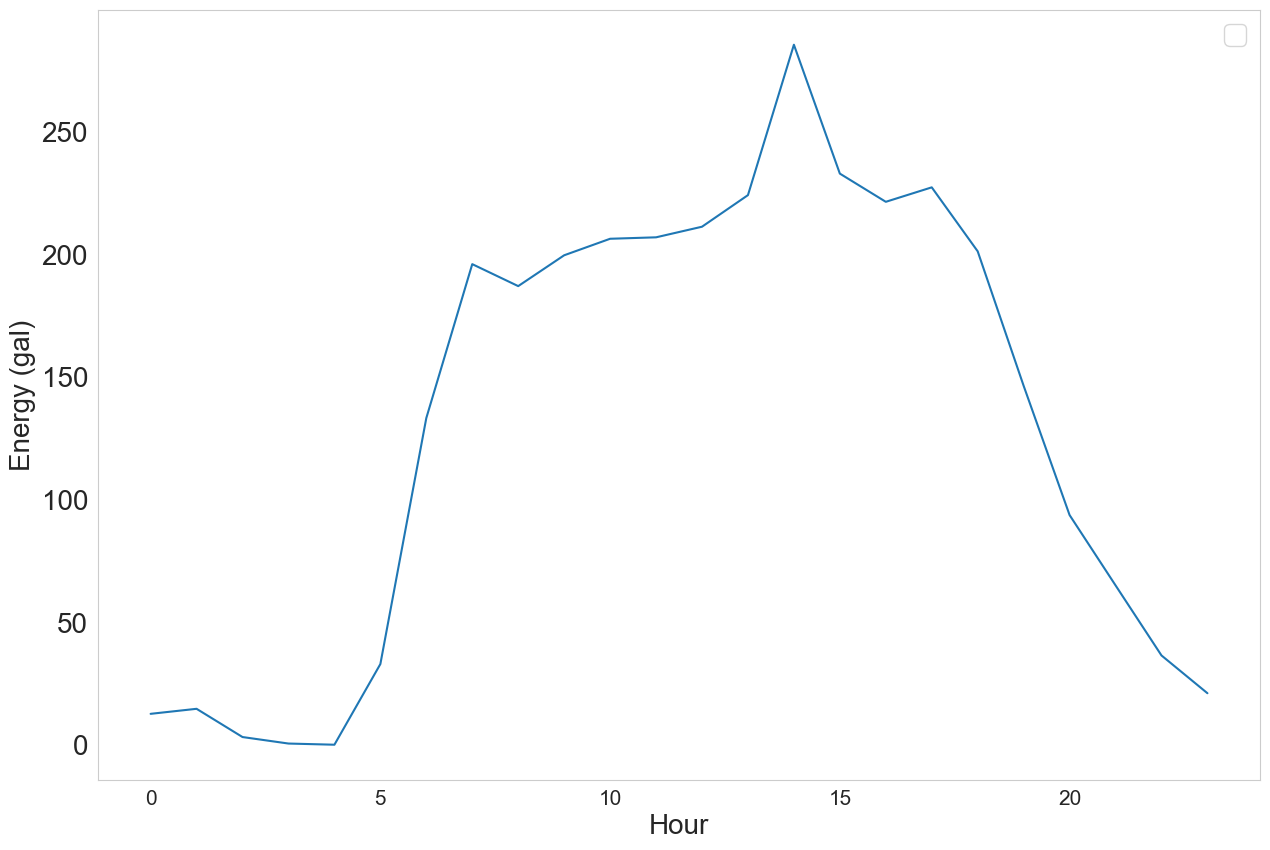

In [104]:
# Plot hourly energy consumption
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='Hour', y='Energy', data=df_model_aggregated_hours, errorbar=None)
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Energy (gal)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid()
fig.savefig(r'../../figures/energy-hour.png', dpi=400, bbox_inches='tight')

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_16800\2318538876.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='fuel_economy', data=df_model_aggregated_hours, ci=None)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


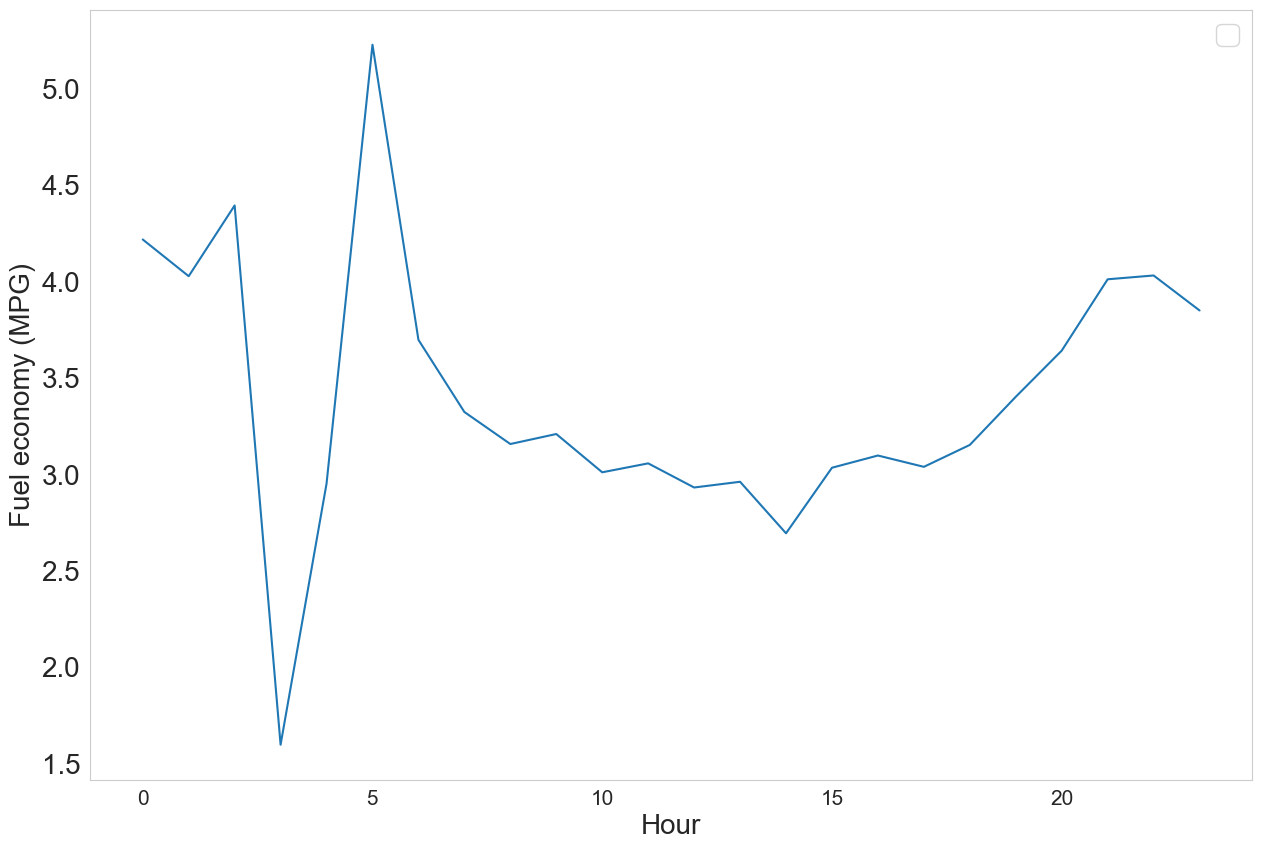

In [105]:
# Plot hourly fuel rate
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='Hour', y='fuel_economy', data=df_model_aggregated_hours, ci=None)
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Fuel economy (MPG)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid()
fig.savefig(r'../../figures/fuel-rate-hour.png', dpi=400, bbox_inches='tight')

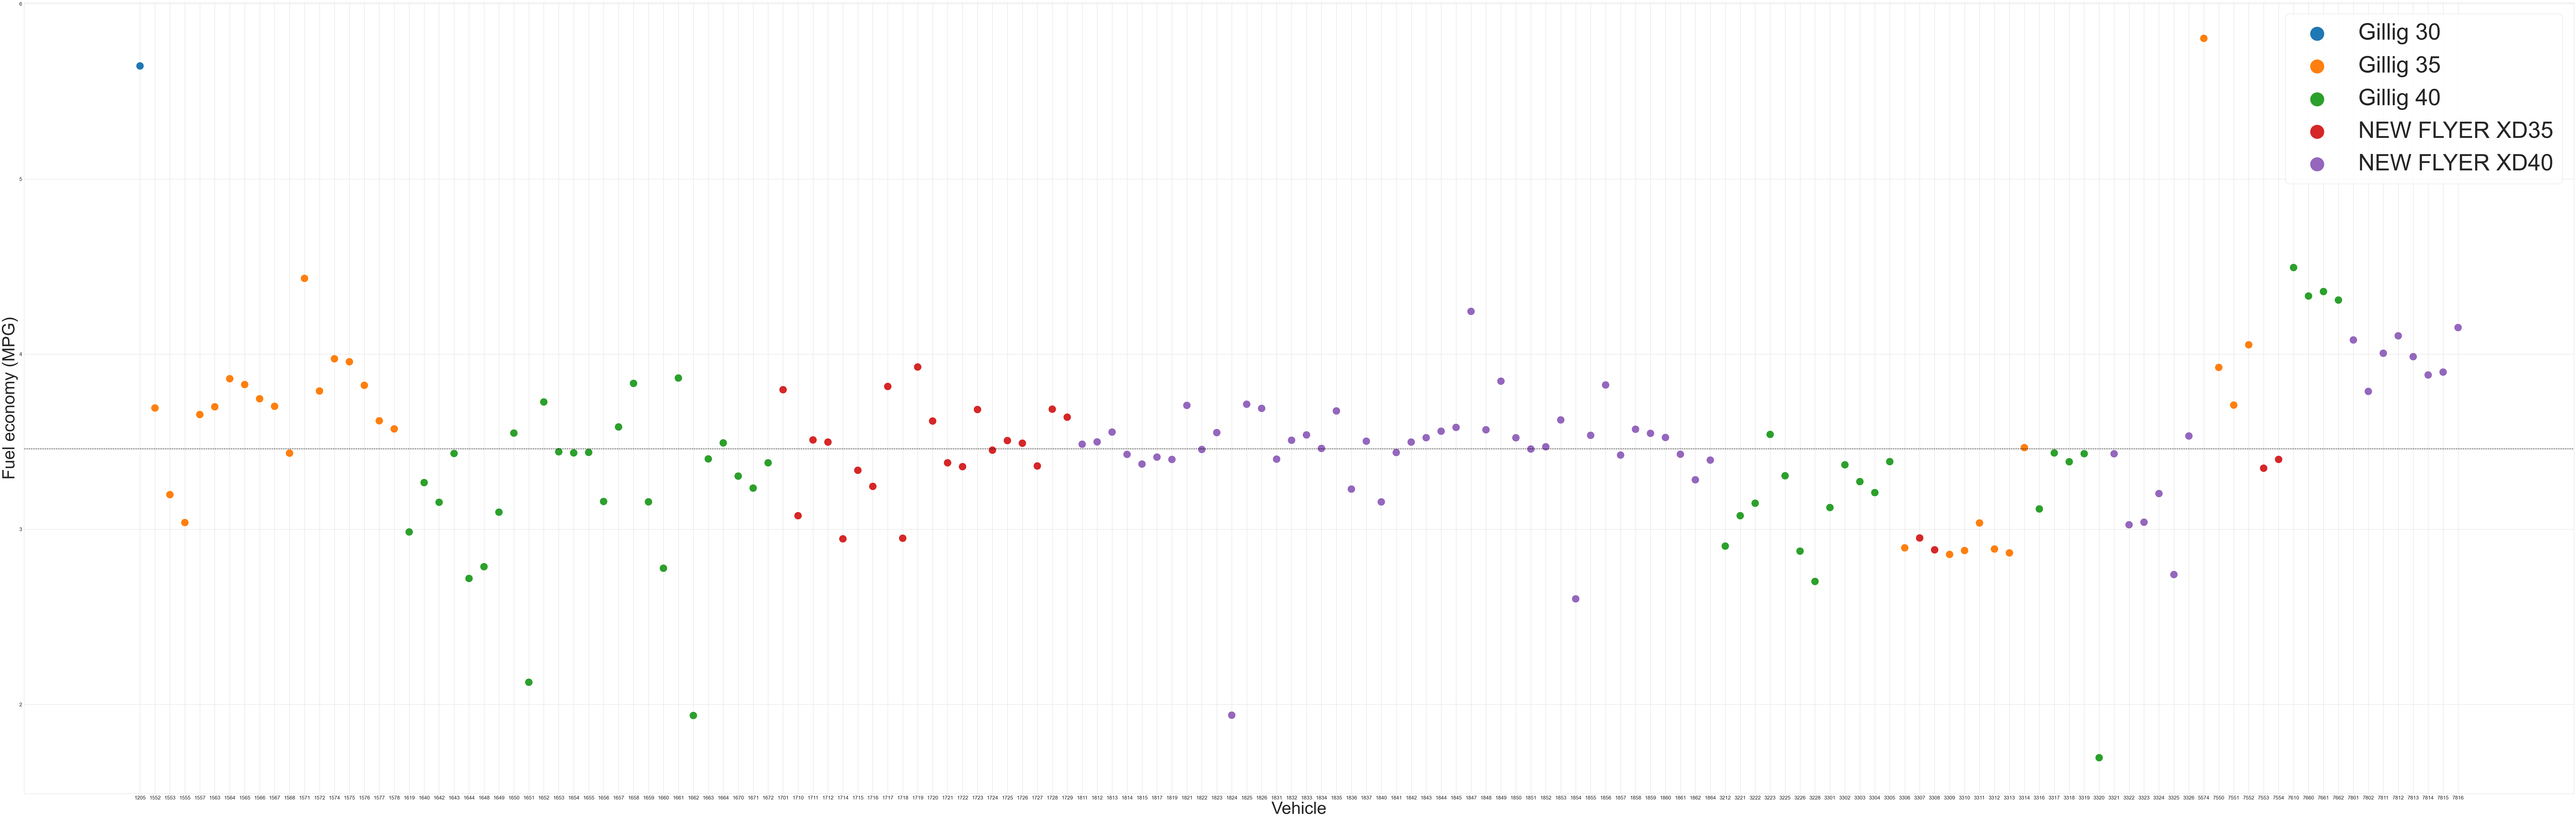

In [106]:
# Plot fuel rate by vehicle
fig, ax = plt.subplots(figsize=(160,50))
df_conventional_integerated['Vehicle'] = df_conventional_integerated.Vehicle.astype(str)
df_conventional_integerated_grouped = df_conventional_integerated.groupby(['Vehicle']).agg({'fuel_economy': ['mean'],'VehicleModel':['max']}).reset_index()
df_conventional_integerated_grouped.columns = df_conventional_integerated_grouped.columns.droplevel(1)
sns.scatterplot(x='Vehicle', y='fuel_economy', data=df_conventional_integerated_grouped, hue='VehicleModel', s=800)
plt.axhline(df_conventional_integerated_grouped['fuel_economy'].mean(),color='black', linestyle='--')
plt.xlabel('Vehicle', fontsize=60)
plt.ylabel('Fuel economy (MPG)', fontsize=60)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=80,markerscale=8)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
fig.savefig(r'../../figures/fuel-economy-per-vehicle.png', dpi=400, bbox_inches='tight')

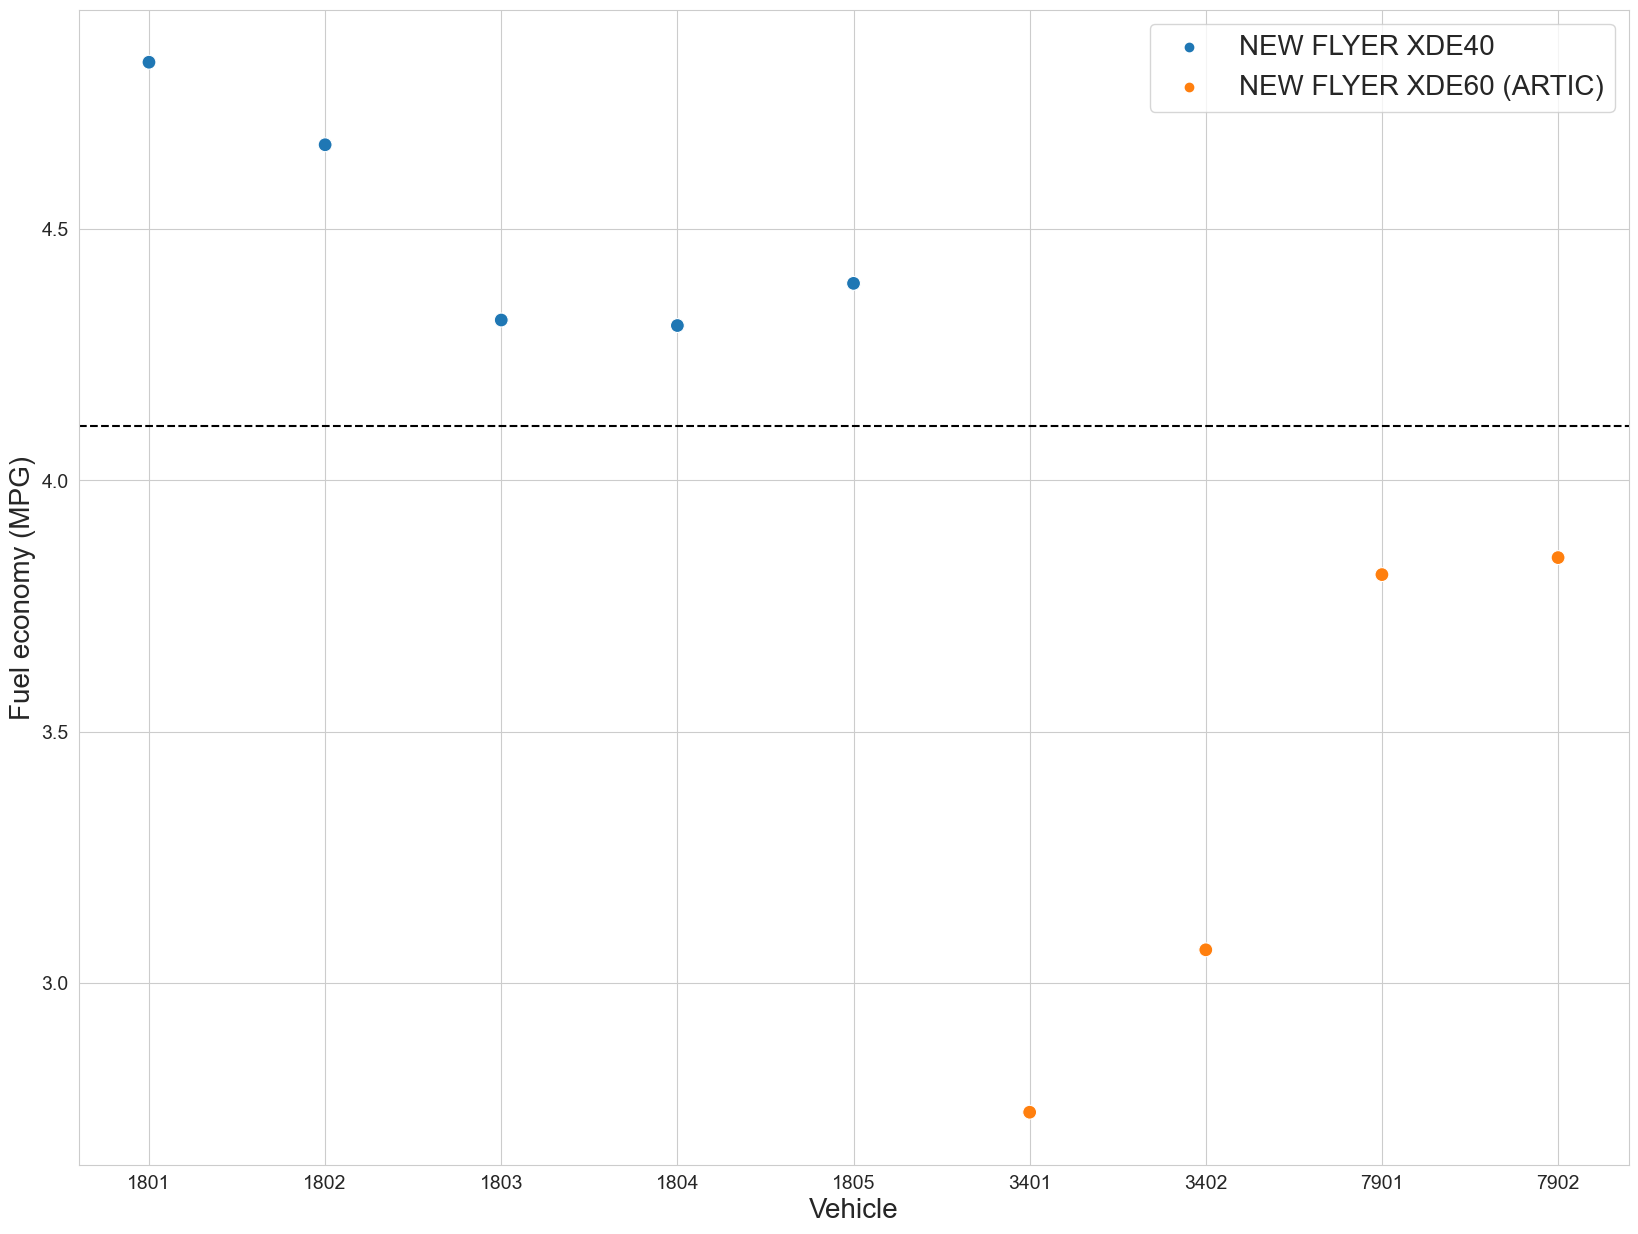

In [107]:
# Plot fuel rate by vehicle (Hybrid)
fig, ax = plt.subplots(figsize=(20,15))
df_hybrid_integerated.sort_values(by=['VehicleModel'], inplace=True)
df_hybrid_integerated['Vehicle'] = df_hybrid_integerated.Vehicle.astype(str)
df_hybrid_integerated_grouped = df_hybrid_integerated.groupby(['Vehicle']).agg({'fuel_economy': ['mean'],'VehicleModel':['max']}).reset_index()
df_hybrid_integerated_grouped.columns = df_hybrid_integerated_grouped.columns.droplevel(1)
sns.scatterplot(x='Vehicle', y='fuel_economy', data=df_hybrid_integerated_grouped, hue='VehicleModel', s=100)
plt.axhline(df_hybrid_integerated['fuel_economy'].mean(),color='black', linestyle='--')
plt.xlabel('Vehicle', fontsize=20)
plt.ylabel('Fuel economy (MPG)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
#plt.plot(df_conventional['residual'].mean(), linewidth=2)
fig.savefig(r'../../figures/fuel-economy-hybrid-per-vehicle.png', dpi=400, bbox_inches='tight')

In [108]:
df_model_aggregated_routes.columns

Index(['Route', 'weekday-weekend', 'fuel_economy'], dtype='object')

In [109]:
df_model_aggregated_routes

Route weekday-weekend  fuel_economy
0     34         Weekday      2.973773
1     38        Saturday      3.403562
2     38          Sunday      3.322774
3     38         Weekday      3.466886
4    39E         Weekday      5.851664
..   ...             ...           ...
95   R42        Saturday      4.978914
96   R42         Weekday      5.191266
97   R44        Saturday      1.955087
98   R44          Sunday      3.085216
99   R44         Weekday      3.334099

[100 rows x 3 columns]

In [110]:
### Heatmap route-based energy consumption

In [111]:
df_model.columns

Index(['ServiceDateTime', 'DateKey', 'CalendarDate', 'Year', 'Month', 'OpKey',
       'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName', 'TripKey', 'Trip',
       'StopKey', 'Stop', 'StopName', 'Lat', 'Lon', 'Vehicle', 'VehicleType',
       'SeatedCap', 'TotalCap', 'Boards', 'Alights', 'Onboard', 'Bike',
       'Wheelchair', 'Weekday', 'Hour', 'Minute', 'Second', 'Date', 'Daytype',
       'time', 'time_delta', 'time_delta_in_seconds', 'dist', 'Speed',
       'Acceleration', 'Powertrain', 'VehicleModel', 'Vehicle_mass',
       'elevation', 'grade', 'Energy'],
      dtype='object')

In [112]:
df_model_diesel=df_model.loc[df_model['Powertrain'] != "electric"]

In [132]:
# Preparation for plotting
df_model_aggregated_routes = df_model_diesel.groupby(['Route','Date' ,'Hour']).agg({'Energy': ['sum'],'dist': ['sum'],'Onboard':['sum'],'Powertrain':['max'],'VehicleModel':['max']}).reset_index()
df_model_aggregated_routes.columns = df_model_aggregated_routes.columns.droplevel(1)
df_model_aggregated_routes['Date'] = pd.to_datetime(df_model_aggregated_routes['Date'])
df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace("X","")
df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace("(","")
df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace(")","")

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_16800\2246354527.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace("(","")
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_16800\2246354527.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_model_aggregated_routes['Route'] = df_model_aggregated_routes['Route'].str.replace(")","")


In [133]:
df_model_aggregated_routes = df_model_aggregated_routes.loc[df_model_aggregated_routes['Route'] != '9999']

In [134]:
df_model_aggregated_routes = df_model_aggregated_routes.groupby(['Route','Hour']).agg({'Energy': ['mean'],'dist': ['mean'],'Onboard':['mean'],'Powertrain':['max'],'VehicleModel':['max']}).reset_index()
df_model_aggregated_routes.columns = df_model_aggregated_routes.columns.droplevel(1)
df_model_aggregated_routes['fuel_economy']=df_model_aggregated_routes['dist']/df_model_aggregated_routes['Energy']
df_model_aggregated_routes['energy_intensity']=df_model_aggregated_routes['Energy']/df_model_aggregated_routes['Onboard']

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_16800\2802376260.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap = sns.heatmap(df_model_aggregated_routes.pivot("Route", "Hour", "Energy"), cmap="YlOrRd")


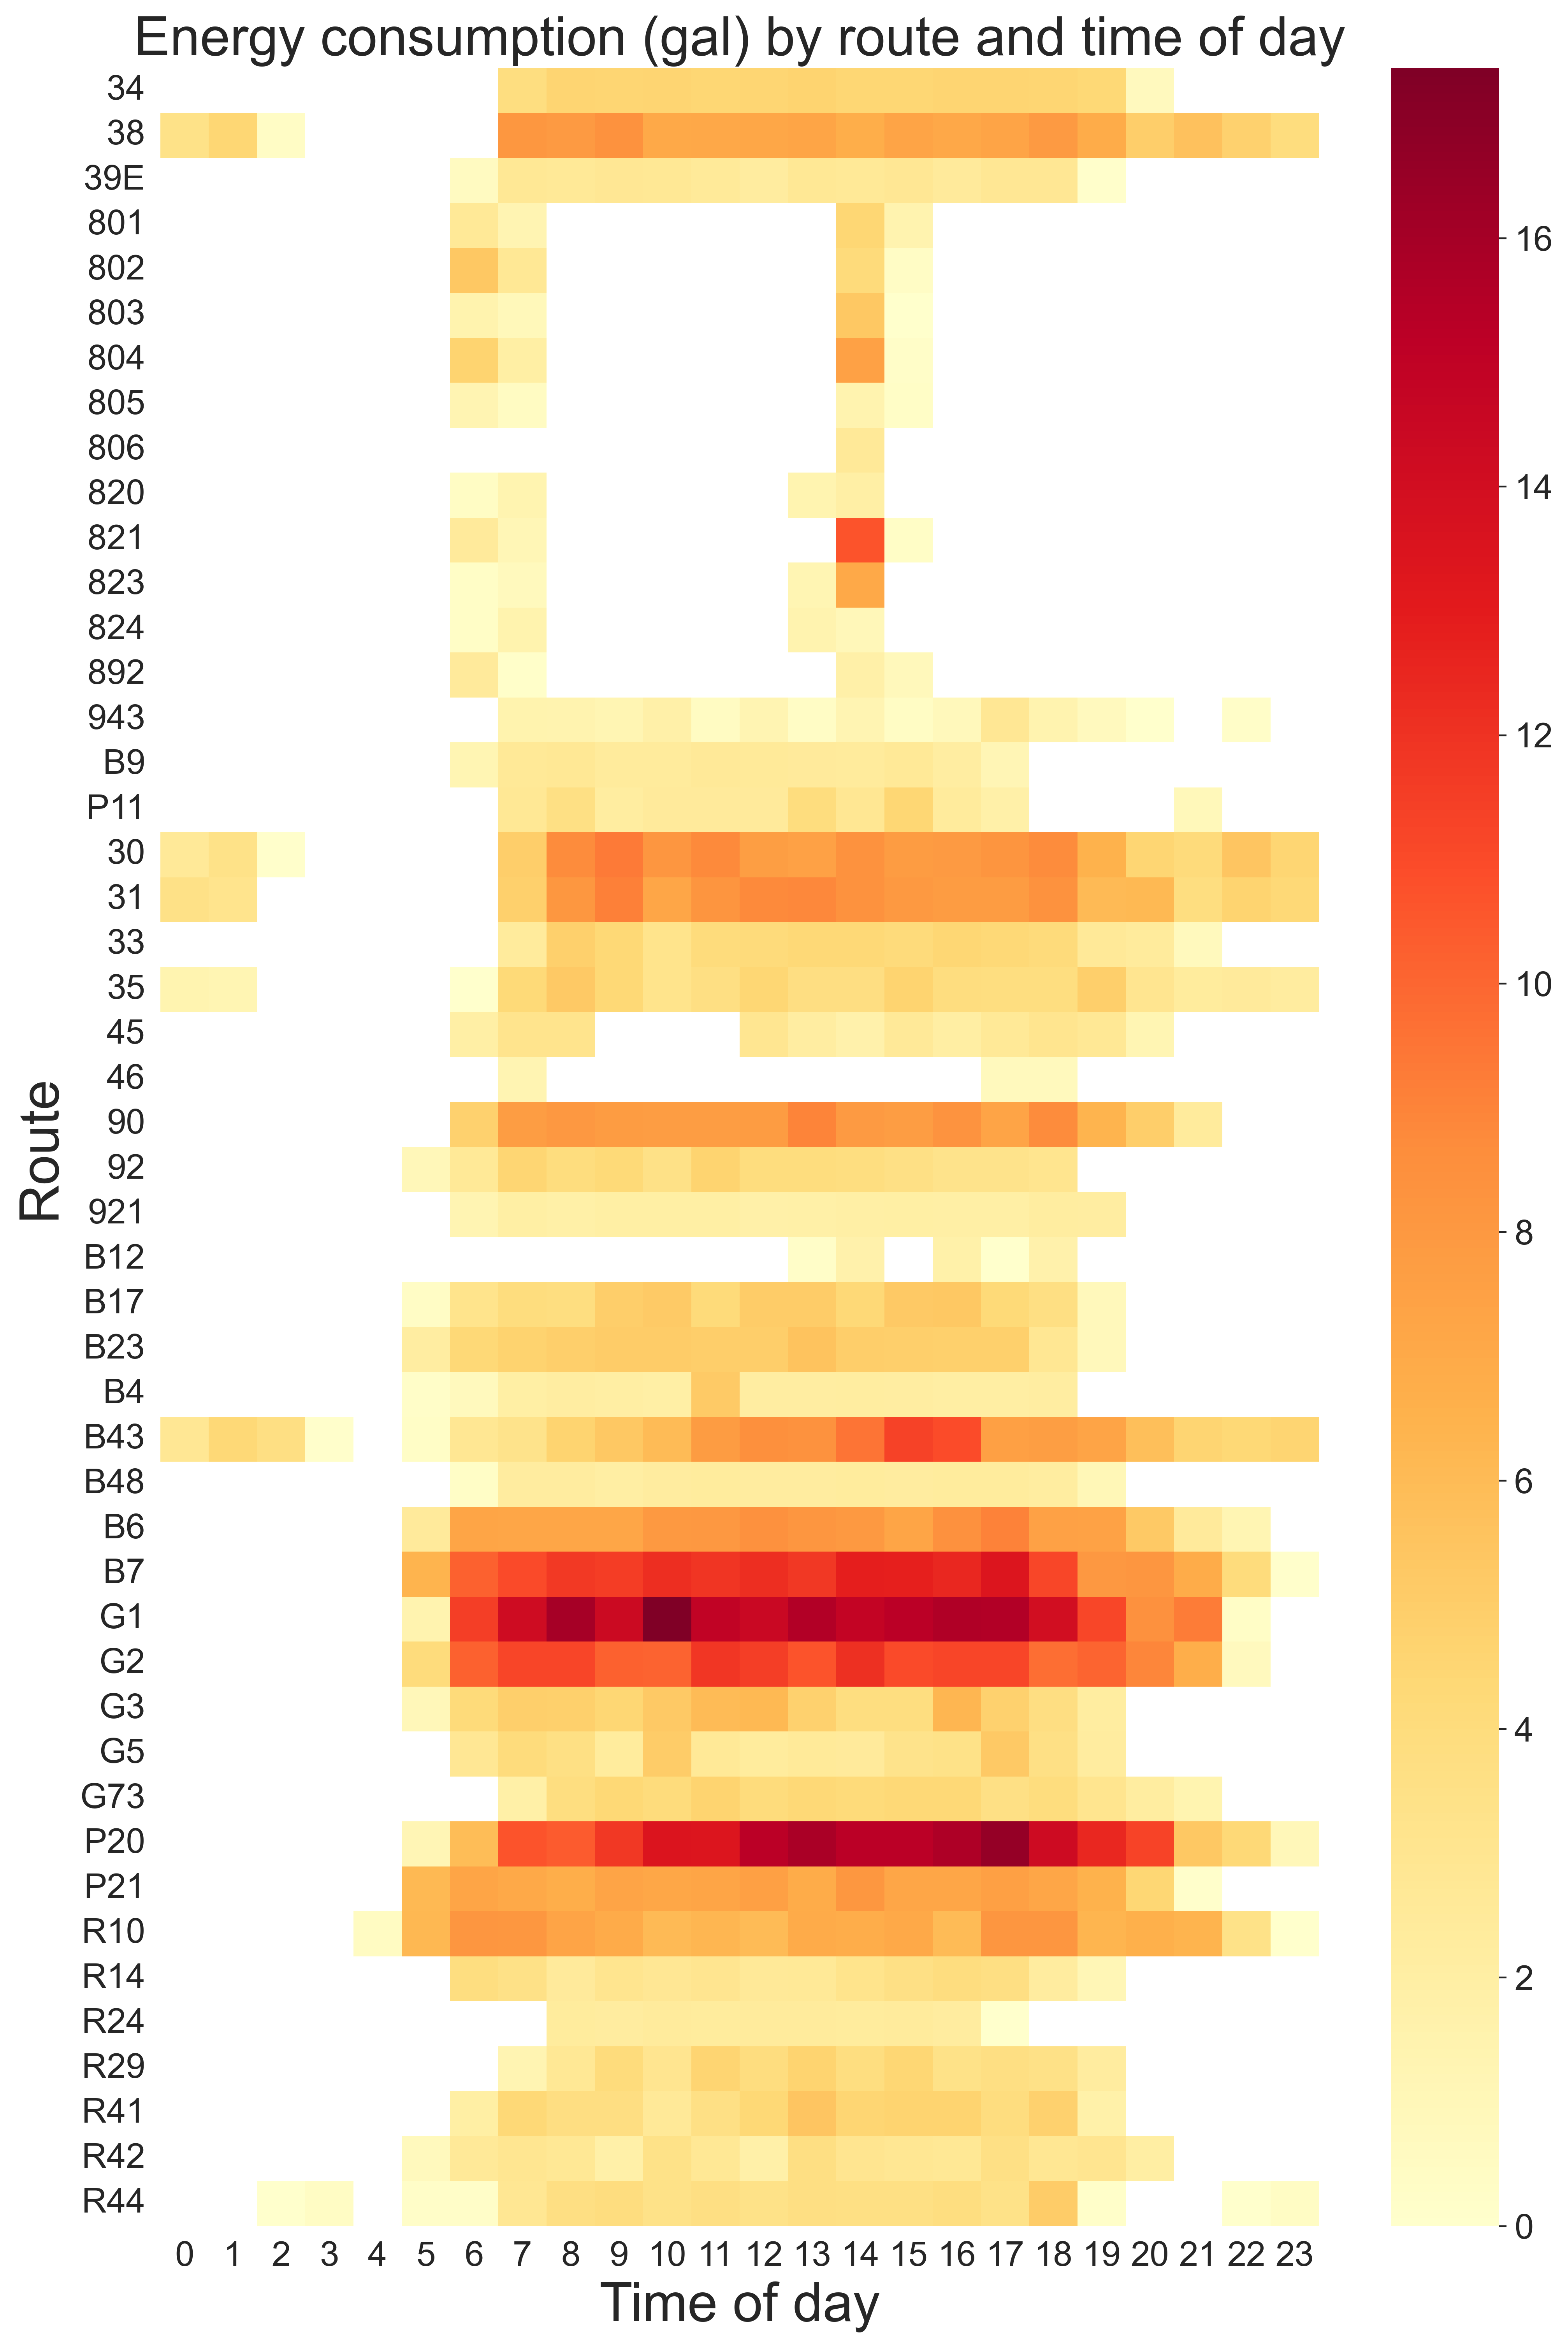

In [116]:
# Set the style of the plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 18), dpi=400)


# Create the heatmap
heatmap = sns.heatmap(df_model_aggregated_routes.pivot("Route", "Hour", "Energy"), cmap="YlOrRd")
plt.ylabel('Route', fontsize=25)
plt.xlabel('Time of day', fontsize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)


# Set the title of the plot
plt.title("Energy consumption (gal) by route and time of day", fontsize=25)

# Show the plot
plt.show()

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_16800\1695461827.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap =sns.heatmap(df_model_aggregated_routes.pivot("Route", "Hour", "fuel_economy"), cmap="YlOrRd")


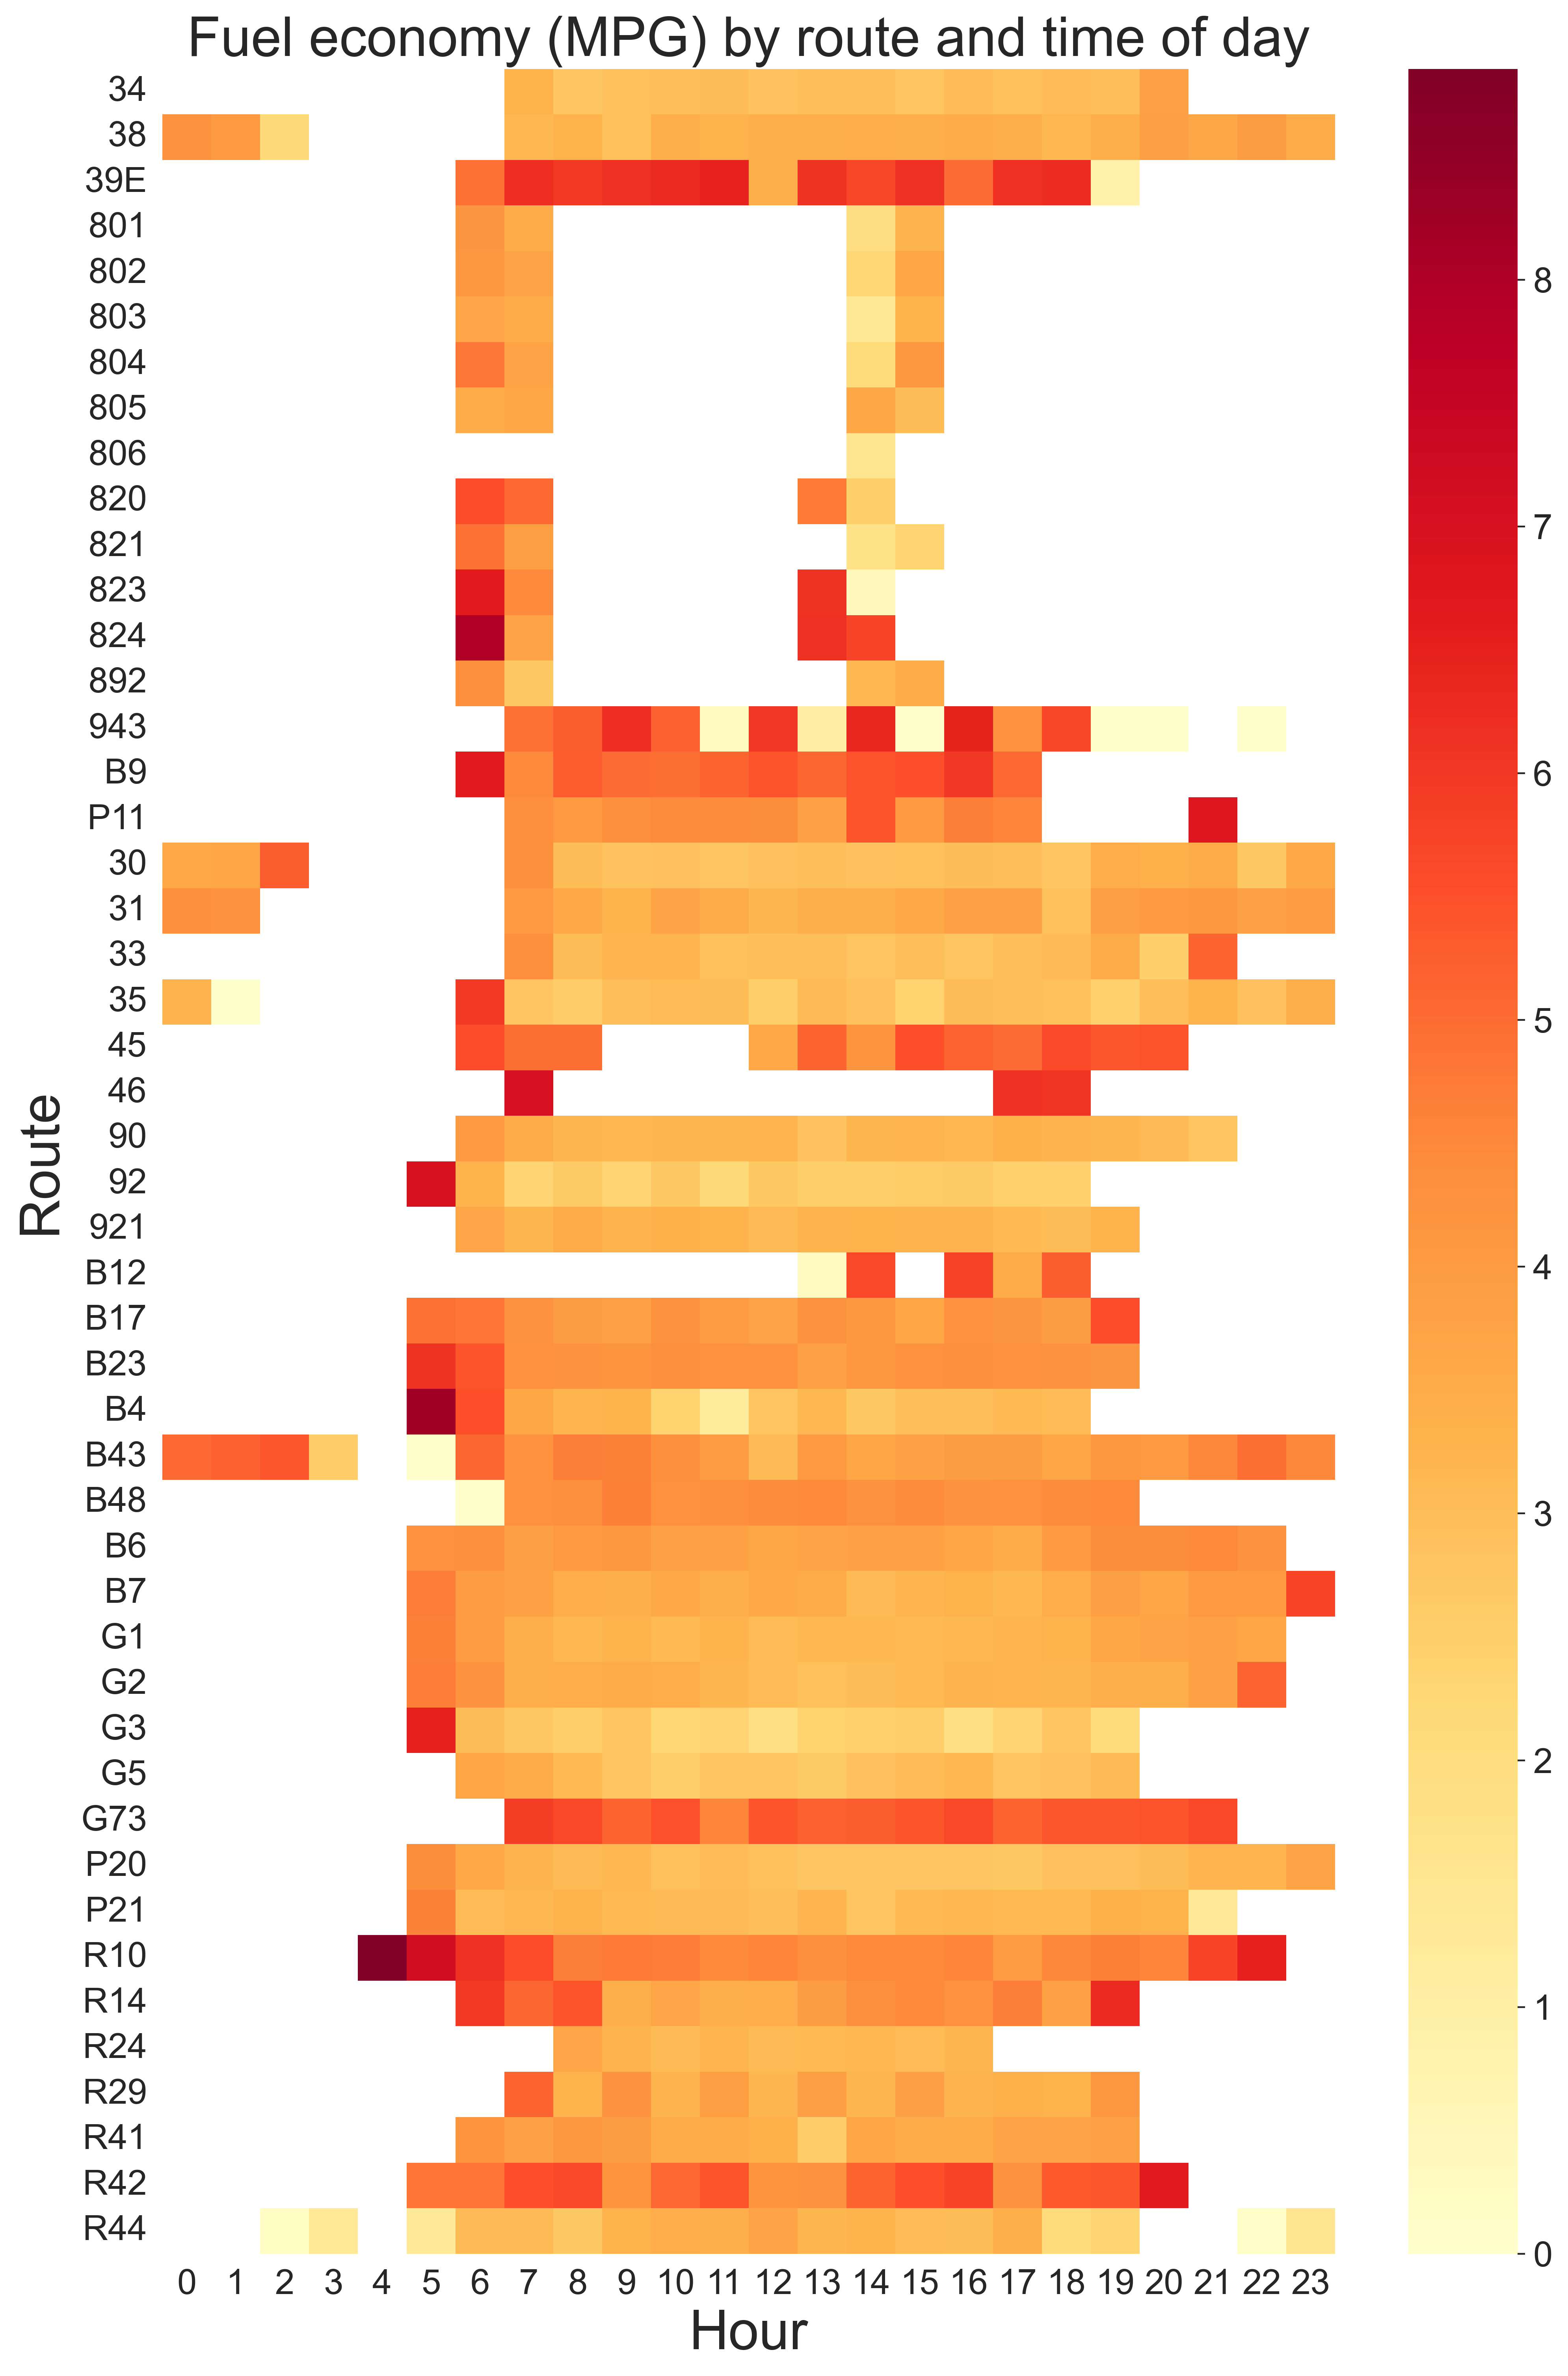

In [117]:
# Set the style of the plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 18), dpi=400)
plt.ylabel('Route', fontsize=25)
plt.xlabel('Time of day', fontsize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Create the heatmap
heatmap =sns.heatmap(df_model_aggregated_routes.pivot("Route", "Hour", "fuel_economy"), cmap="YlOrRd")

# Set the title of the plot
plt.title("Fuel economy (MPG) by route and time of day", fontsize=25)

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)

# Show the plot
plt.show()

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_16800\2589119751.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap = sns.heatmap(df_model_aggregated_routes.pivot("Route", "Hour", "energy_intensity"), cmap="YlOrRd")


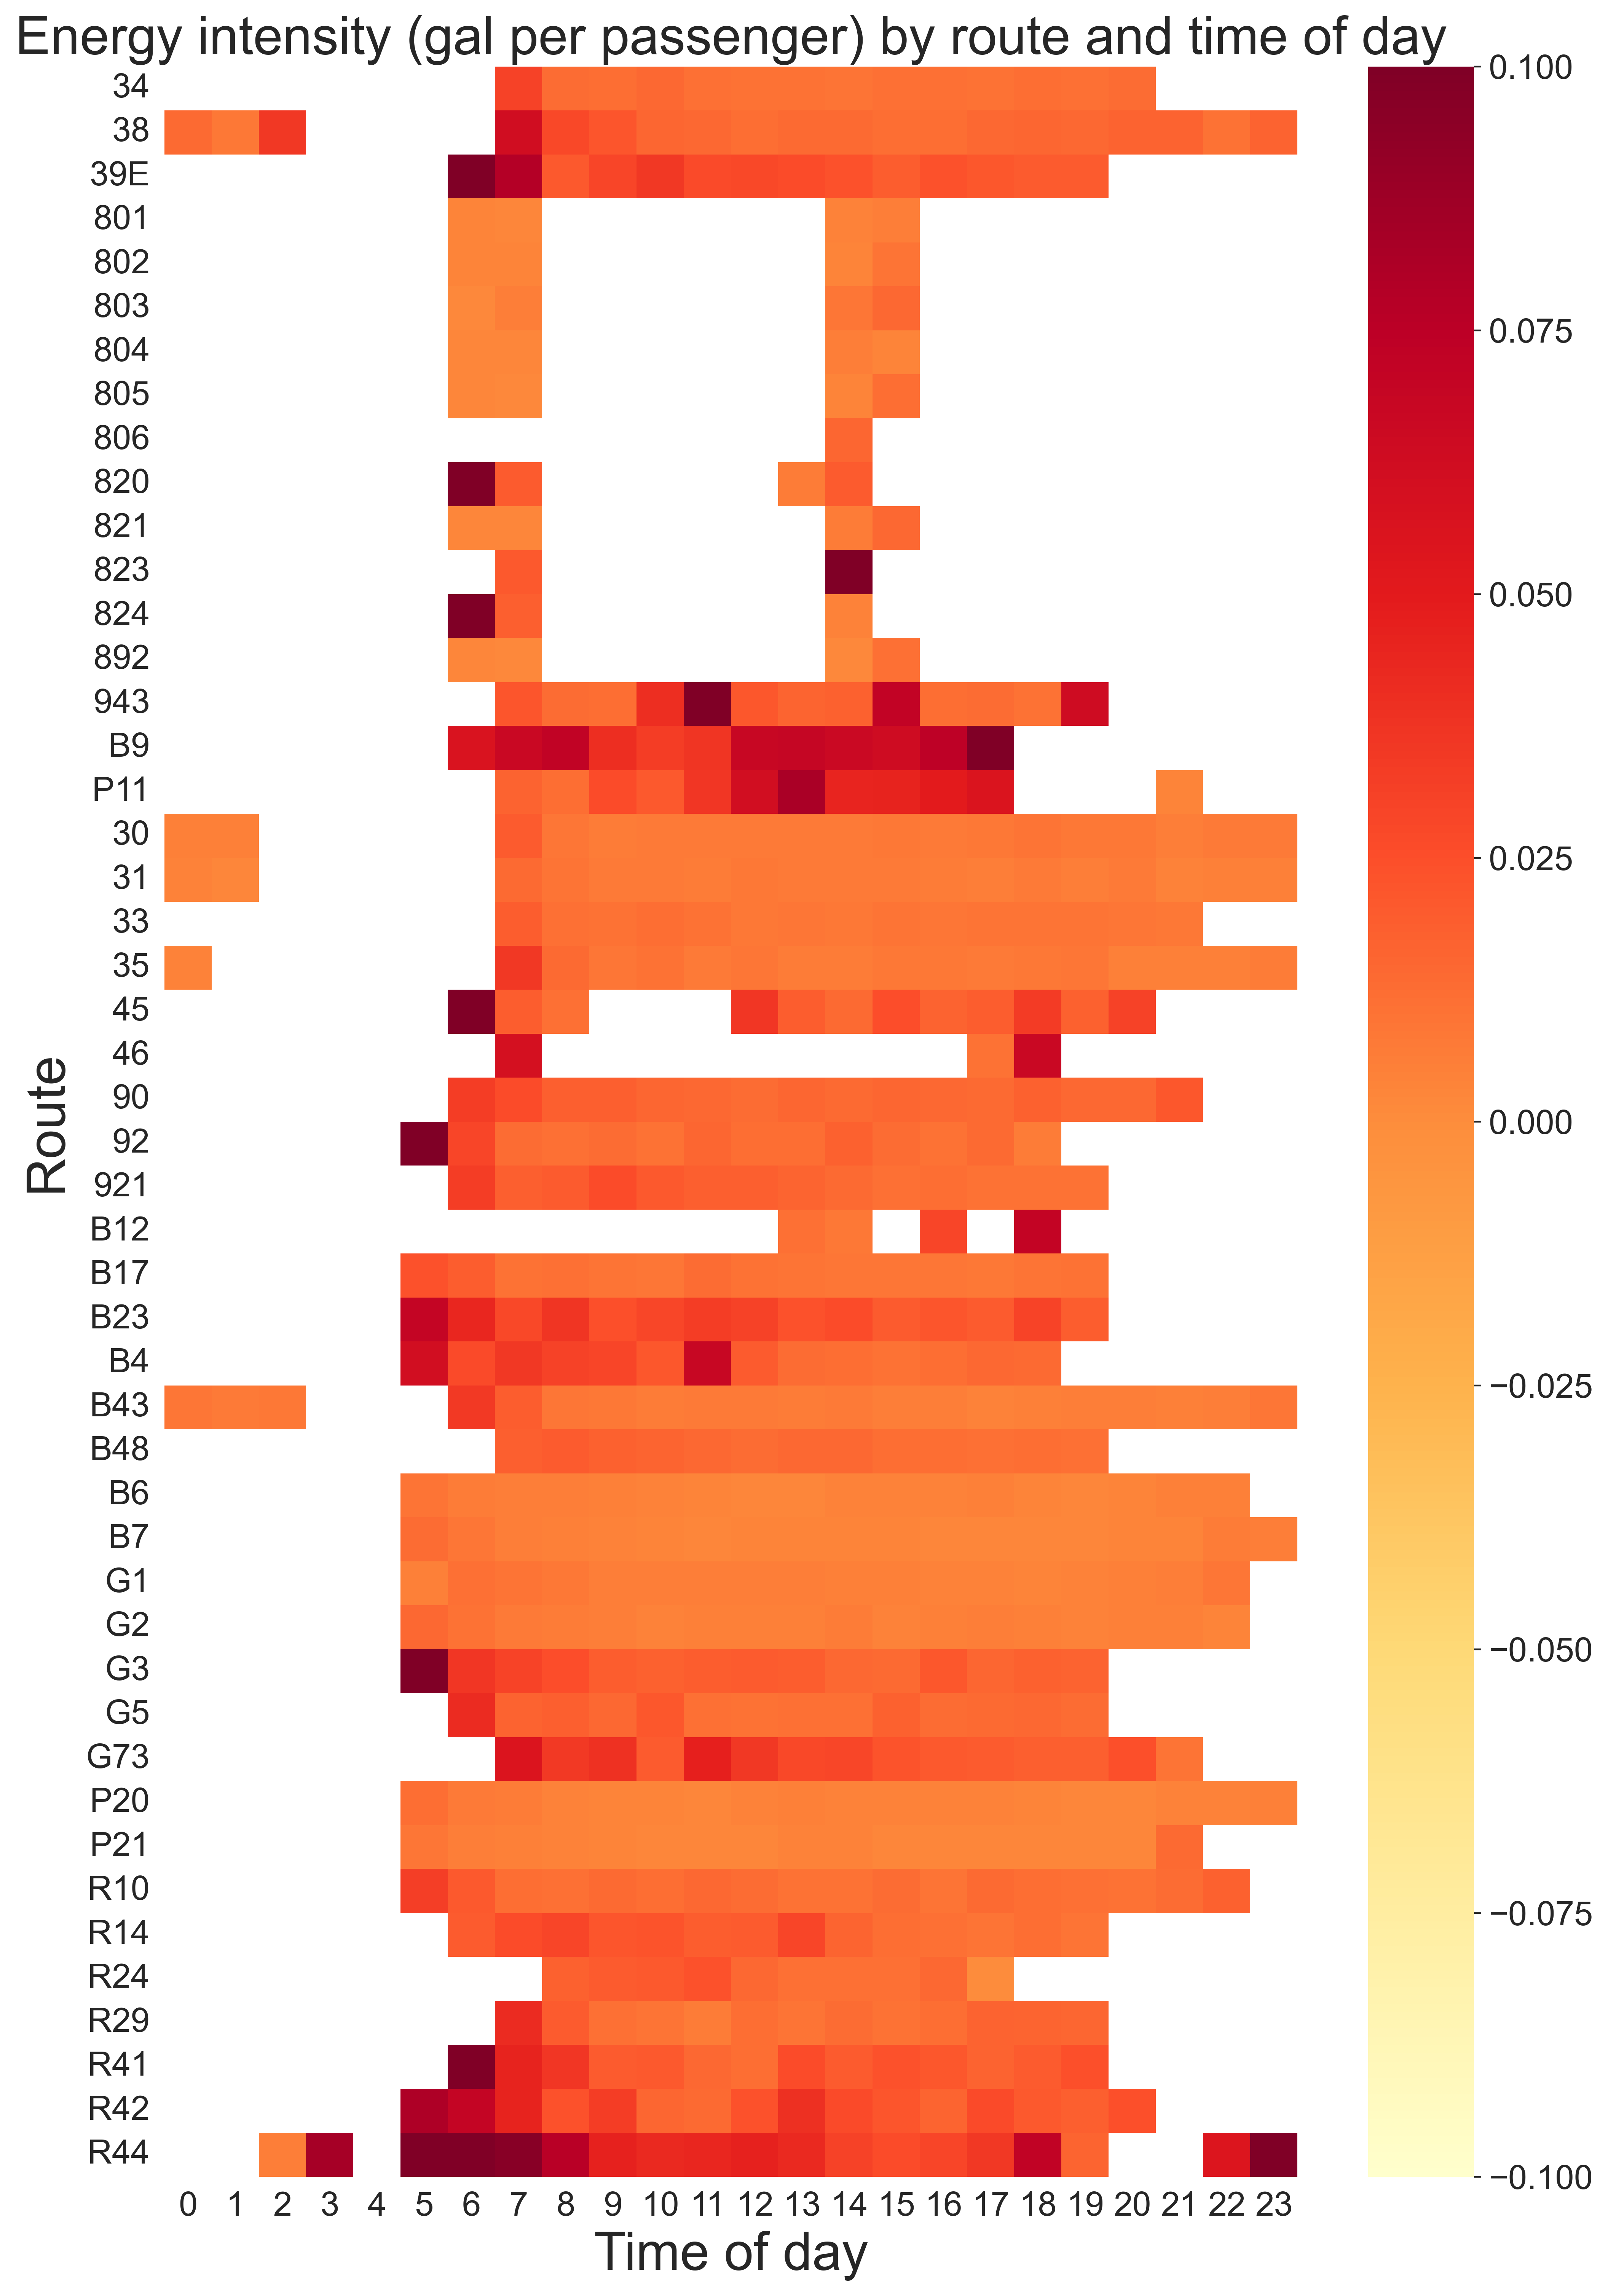

In [135]:
# Set the style of the plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 18), dpi=400)


# Create the heatmap
heatmap = sns.heatmap(df_model_aggregated_routes.pivot("Route", "Hour", "energy_intensity"), cmap="YlOrRd")
plt.ylabel('Route', fontsize=25)
plt.xlabel('Time of day', fontsize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)


# Set the title of the plot
plt.title("Energy intensity (gal per passenger) by route and time of day", fontsize=25)

# Show the plot
plt.show()

In [140]:
df_model.Route.unique()

array(['R44', '(X) 39E', 'B43', '9999', '(X) P11', 'X92', '(X) 821',
       '(X) 804', '(X) 892', '(X) 823', '(X) 801', '(X) 820', 'G5',
       '(X) 802', 'X90', 'B4', 'R14', 'R10', 'G1', 'R29', 'B17', 'G3',
       '(X) 805', '(X) 824', '921', '(X) 803', 'G73', 'P20', 'P21', 'B6',
       'B7', 'G2', 'B12', '(X) 806', '(X) B9', 'B23', 'R24', '31', '30',
       '(X) 38', '33', '46', '45', '35', '(X) 34', 'R41', 'R42', 'B48',
       '(X) 943'], dtype=object)

In [164]:
df_model['RouteName'].loc[df_model['Route']=='R10']

4735      Westfield/WSU/West Springfield via Route
4736      Westfield/WSU/West Springfield via Route
4737      Westfield/WSU/West Springfield via Route
4738      Westfield/WSU/West Springfield via Route
4739      Westfield/WSU/West Springfield via Route
                            ...                   
990089    Westfield/WSU/West Springfield via Route
990090    Westfield/WSU/West Springfield via Route
990091    Westfield/WSU/West Springfield via Route
990092    Westfield/WSU/West Springfield via Route
990093    Westfield/WSU/West Springfield via Route
Name: RouteName, Length: 50188, dtype: object

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_16800\1185541710.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_16800\1185541710.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


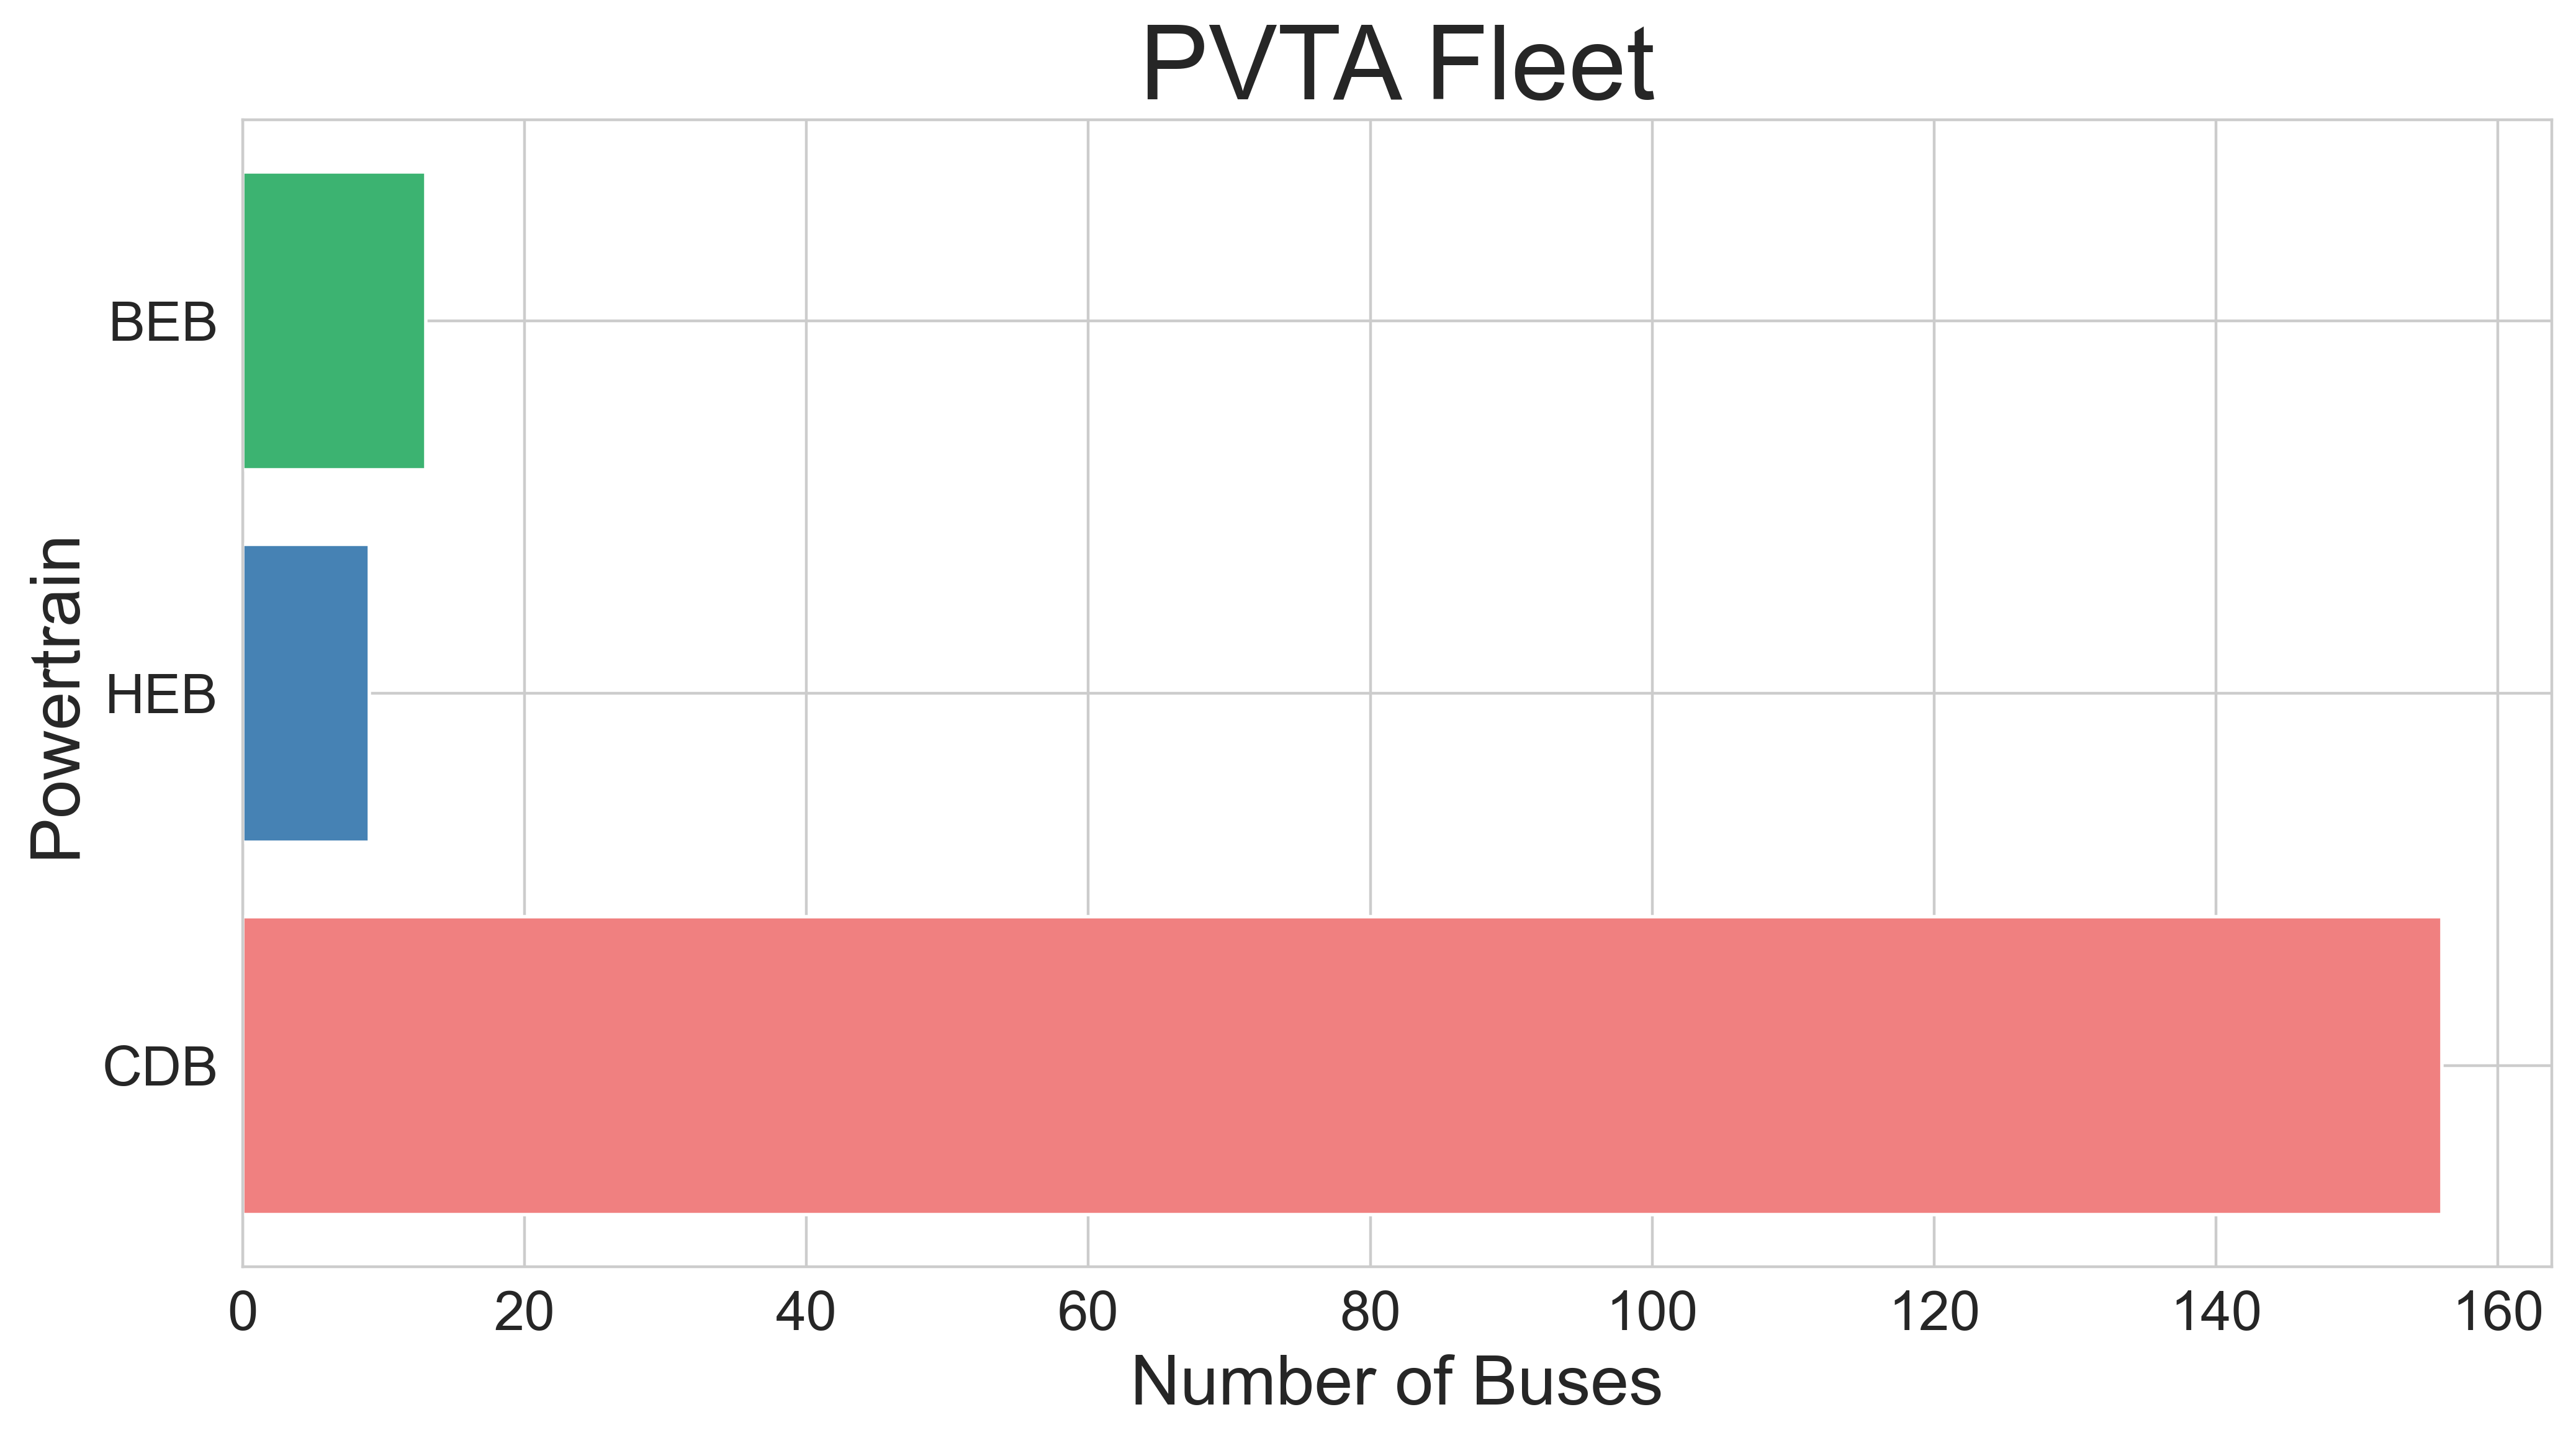

In [152]:
# Data
buses = [156, 9, 13]
labels = ['CDB', 'HEB', 'BEB']
colors = ['lightcoral', 'steelblue', 'mediumseagreen']

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 6), dpi=400)
ax.barh(labels, buses, color=colors)

# Add labels and title
ax.set_xlabel('Number of Buses', fontsize=20)
ax.set_ylabel('Powertrain', fontsize=20)
ax.set_title('PVTA Fleet', fontsize=30)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


# Show the plot
plt.show()
